In [1]:
# Standard library imports
import os

# Scientific computing libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Time series analysis libraries
from arch import arch_model
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse

# Deep learning libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models

# Utility libraries
import optuna # Hyperparameter optimization
from optuna.visualization import plot_parallel_coordinate, plot_slice, plot_param_importances
from tqdm import tqdm

# Custom libraries
from effKAN import KAN

In [2]:
#read car data
data = pd.read_csv('./data/car_data.csv')

In [3]:
data.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
#check for missing values
data.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [6]:
data = data.fillna('0')

# Graph

## Univariable Analysis

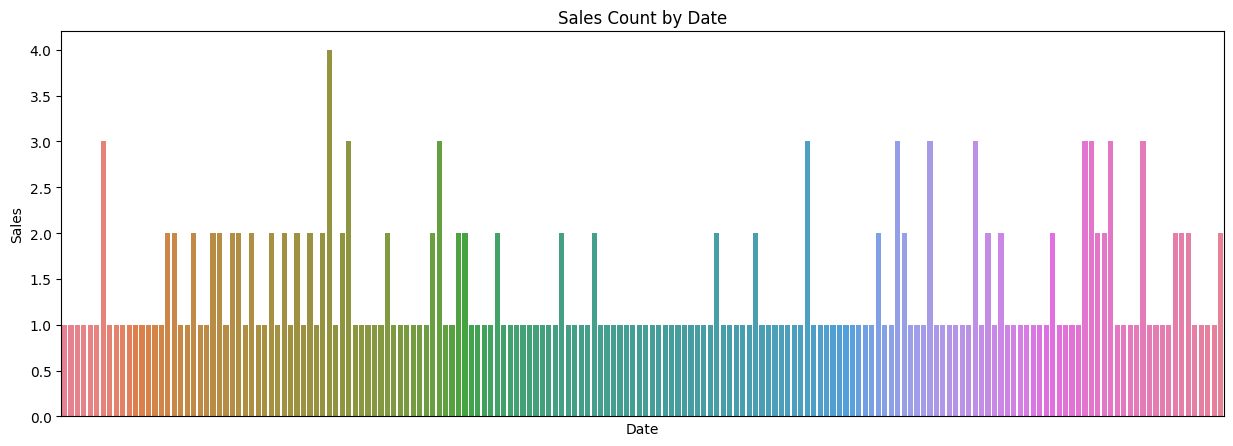

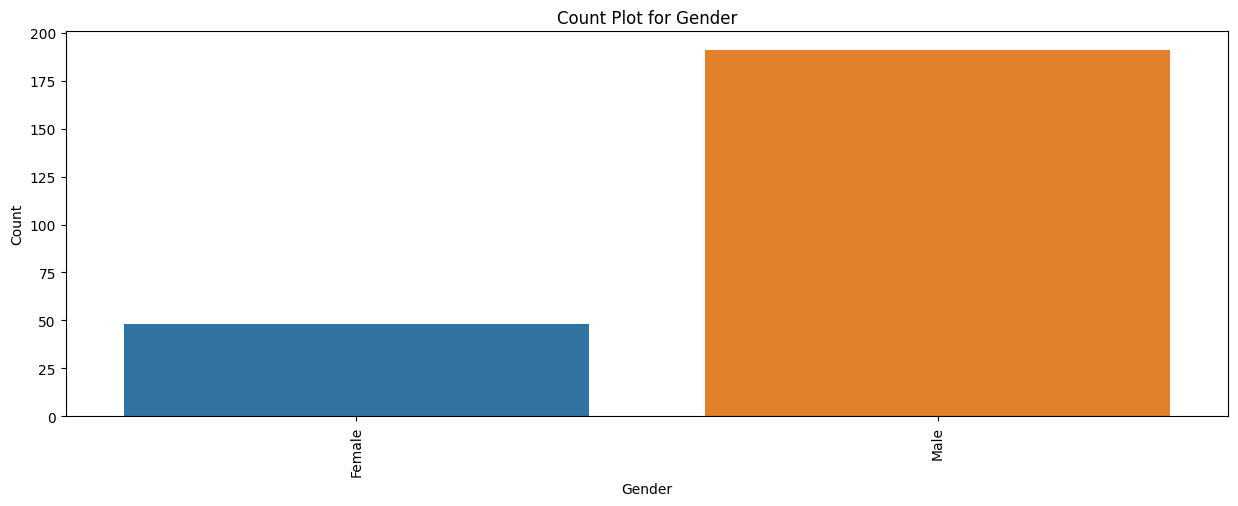

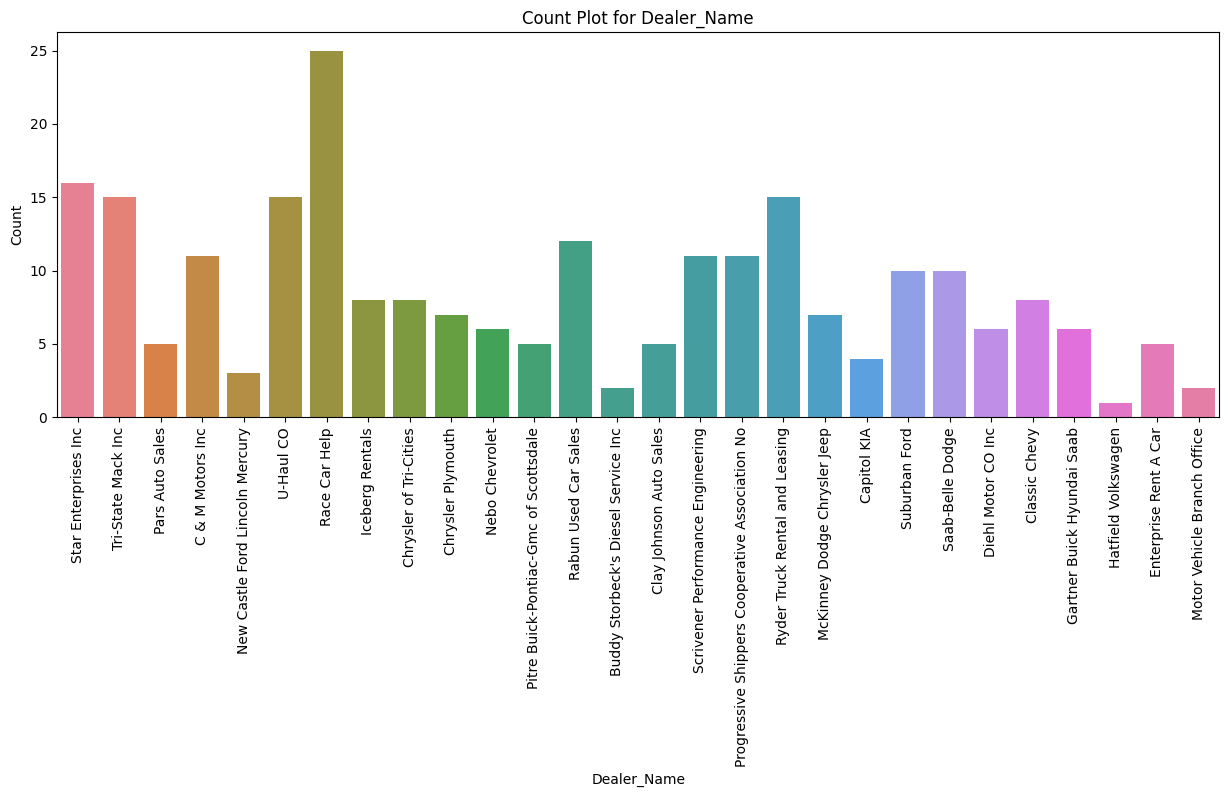

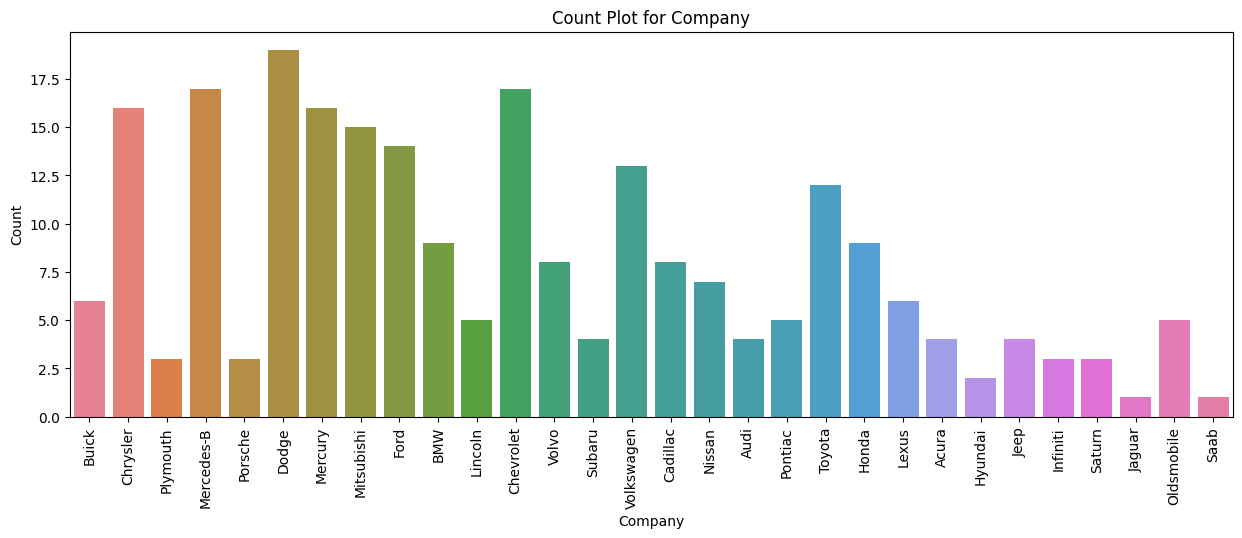

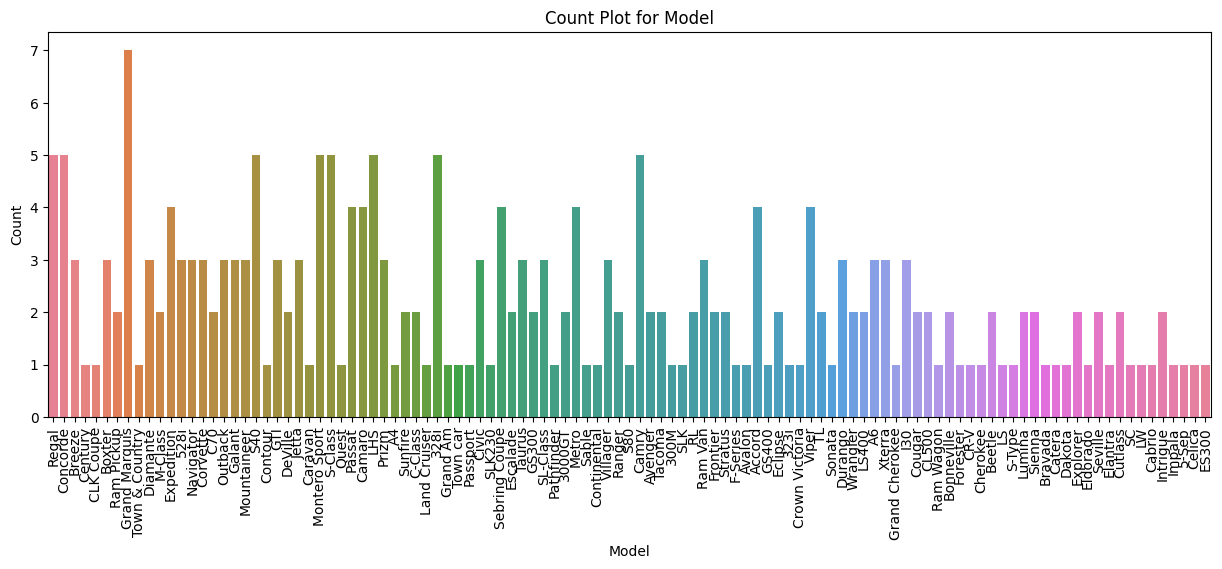

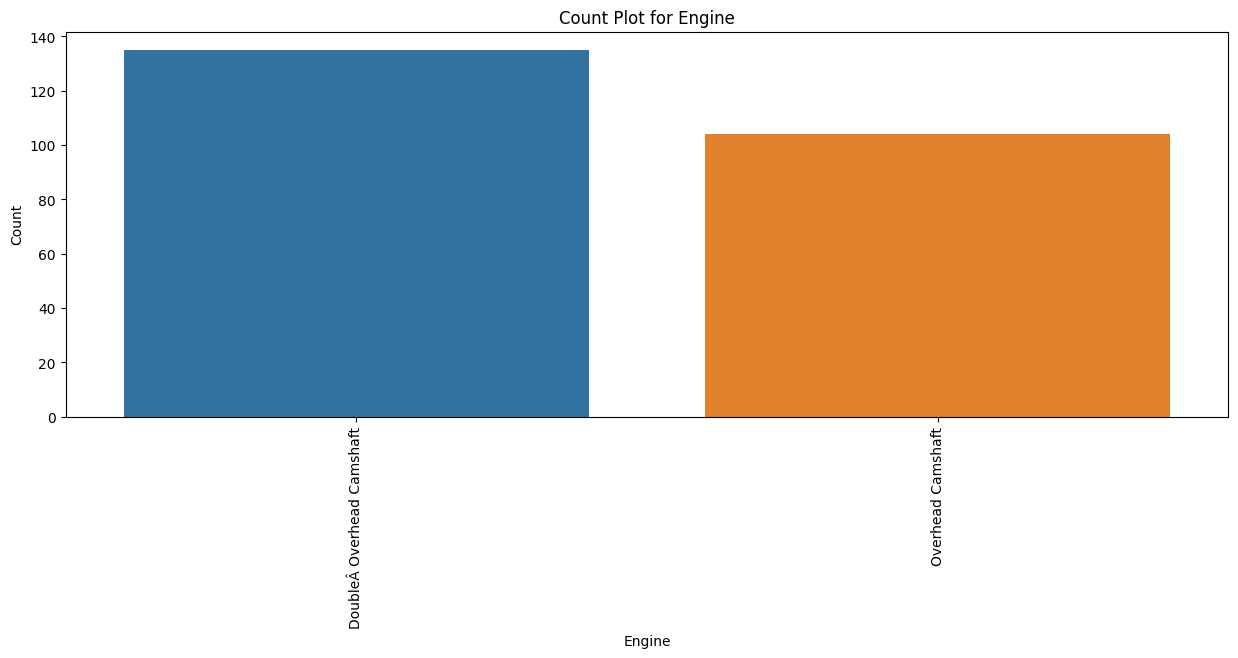

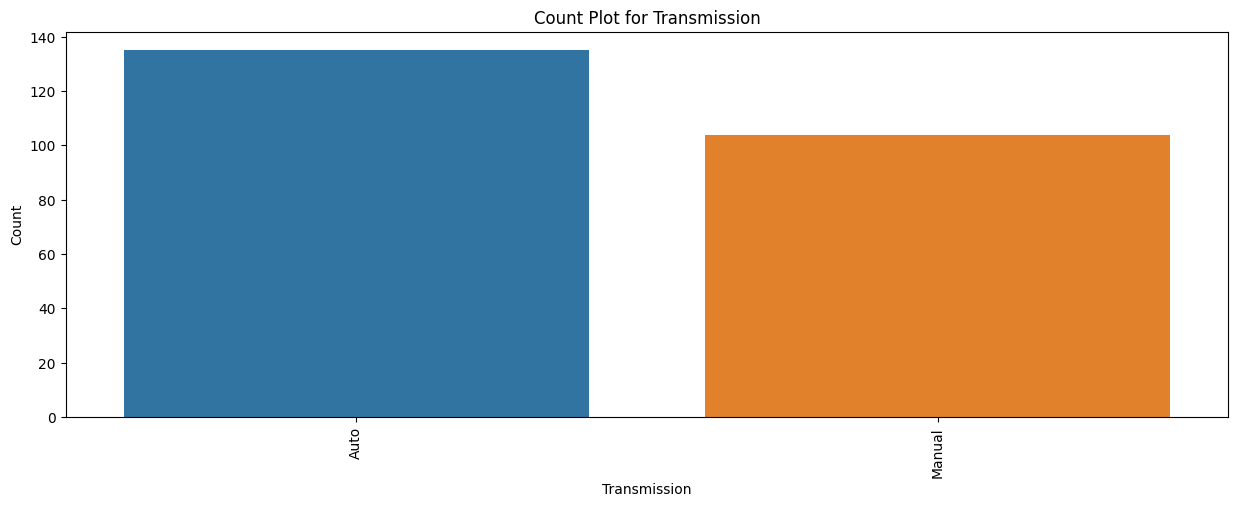

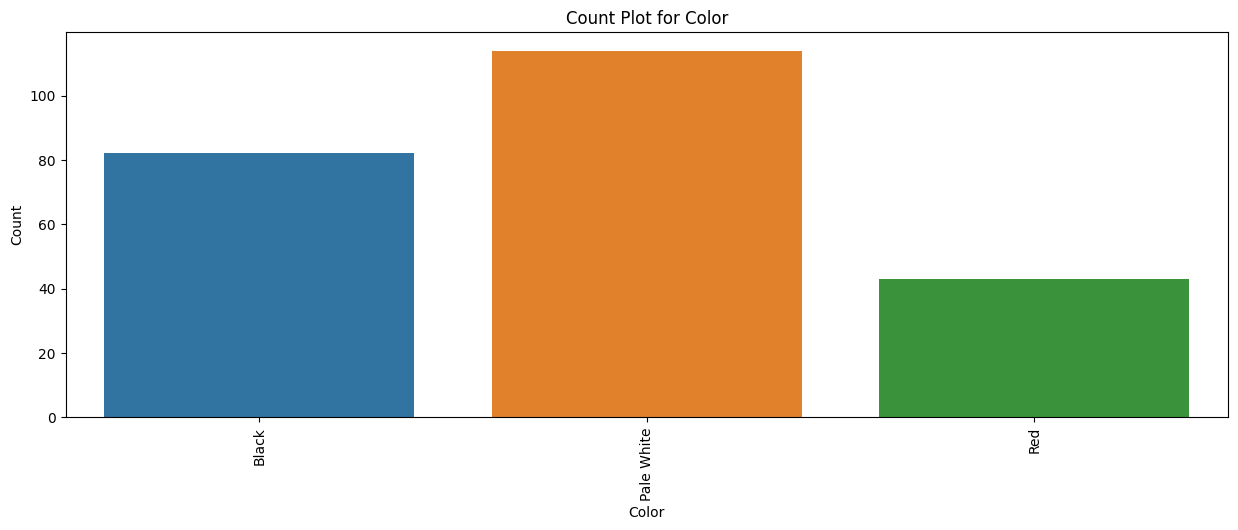

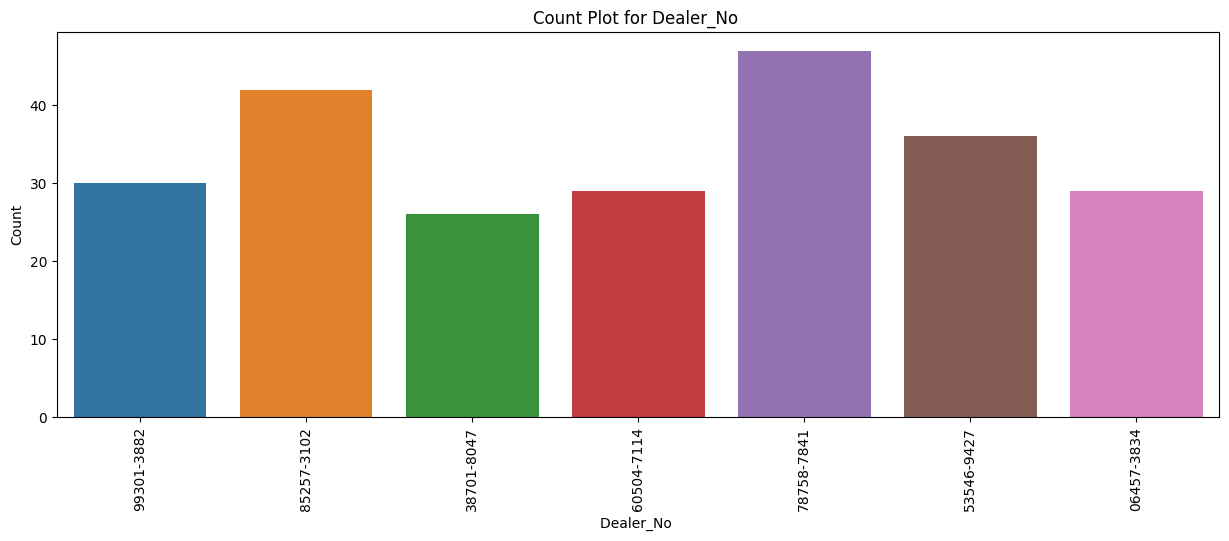

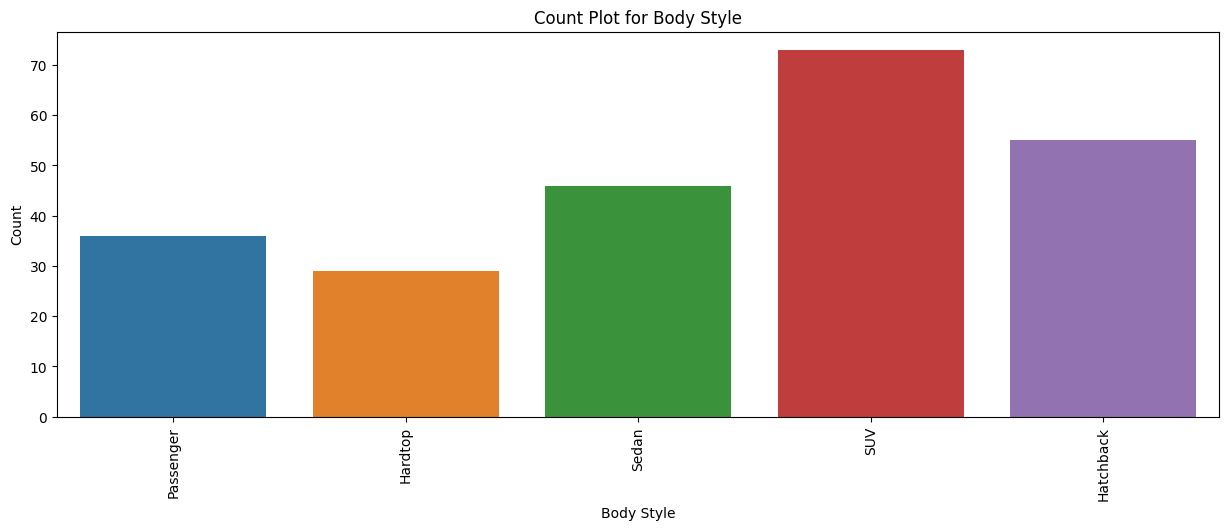

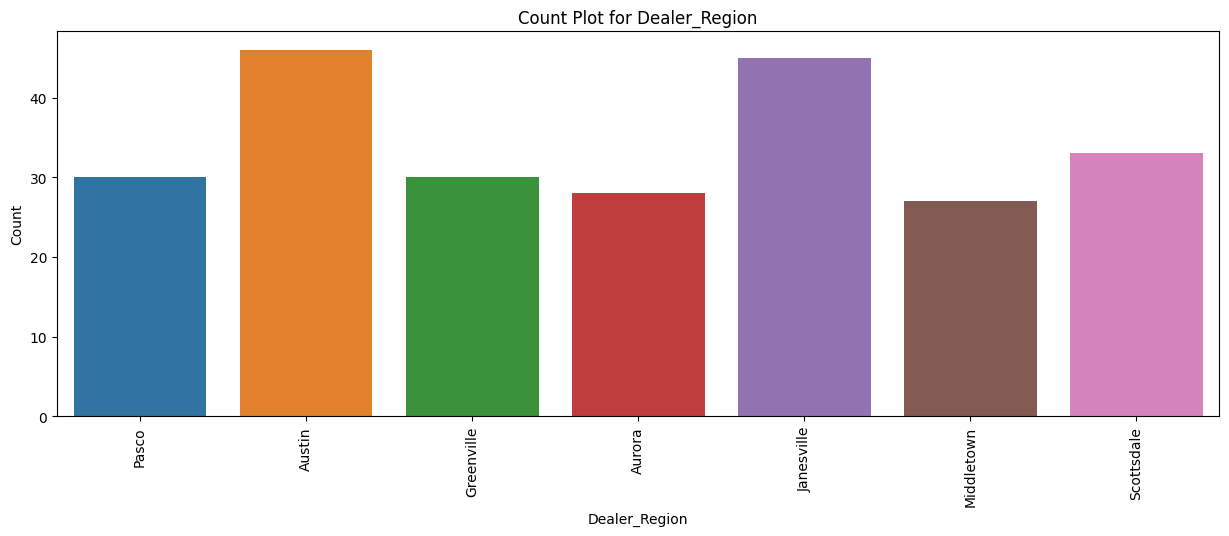

In [7]:
sampled_data = data.sample(frac=0.01, random_state=42)

object_columns = sampled_data.select_dtypes(include=['object']).columns
object_columns = object_columns.drop(['Car_id','Customer Name','Date'])

if not os.path.exists('./graph/univariate'):
    os.makedirs('./graph/univariate')

# For Date Count
sales_counts = sampled_data['Date'].value_counts().sort_index().reset_index()
sales_counts.columns = ['Date', 'Sales']
plt.figure(figsize=(15, 5))
sns.barplot(x='Date', y='Sales', data=sales_counts, hue='Date')
plt.title('Sales Count by Date')
plt.xticks([])
plt.savefig('./graph/univariate/sales_count_by_date.png')
plt.show()

for i in range(len(object_columns)):
    plt.figure(figsize=(15, 5))
    sns.countplot(x=object_columns[i], data=sampled_data, hue=object_columns[i])
    plt.title(f'Count Plot for {object_columns[i]}')
    plt.xlabel(object_columns[i])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.savefig(f'./graph/univariate/{object_columns[i]}_countplot.png')

plt.show()

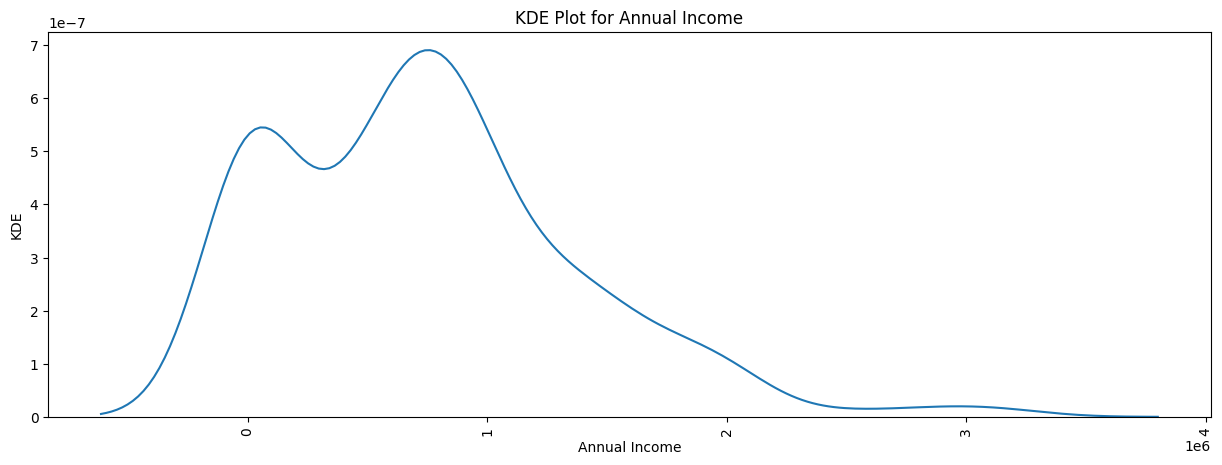

In [8]:
plt.figure(figsize=(15, 5))
sns.kdeplot(x=sampled_data['Annual Income'], data=sampled_data)
plt.title(f'KDE Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('KDE')
plt.xticks(rotation=90)
plt.savefig(f'./graph/univariate/Annual_Income_KDEplot.png')
plt.show()

## Bivariable Analysis

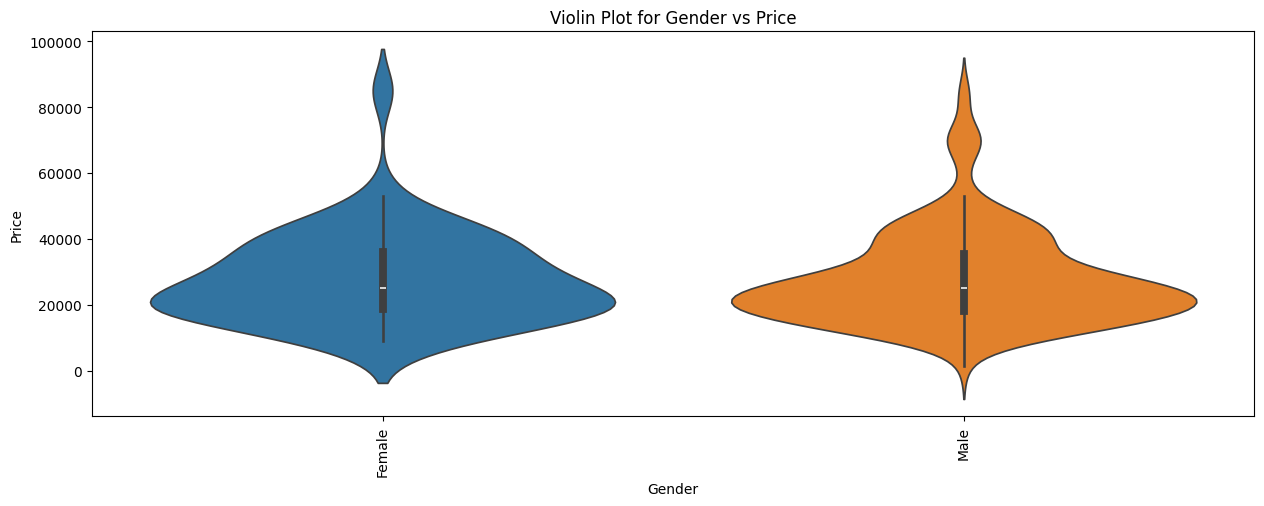

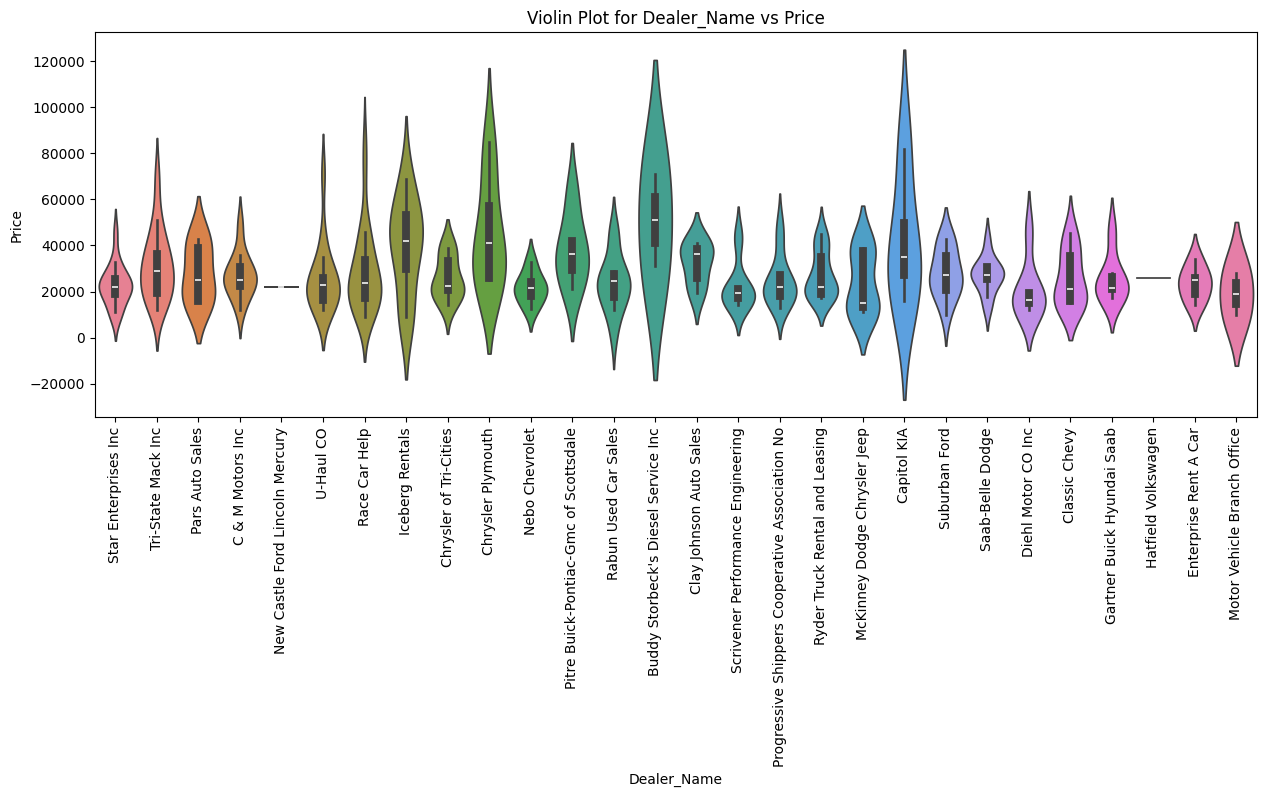

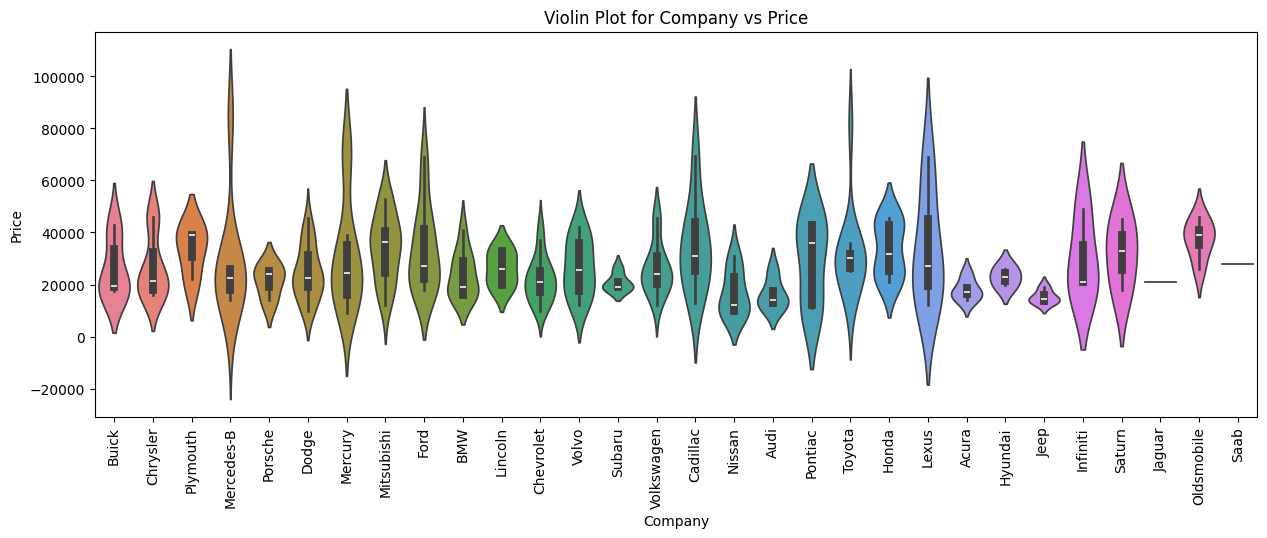

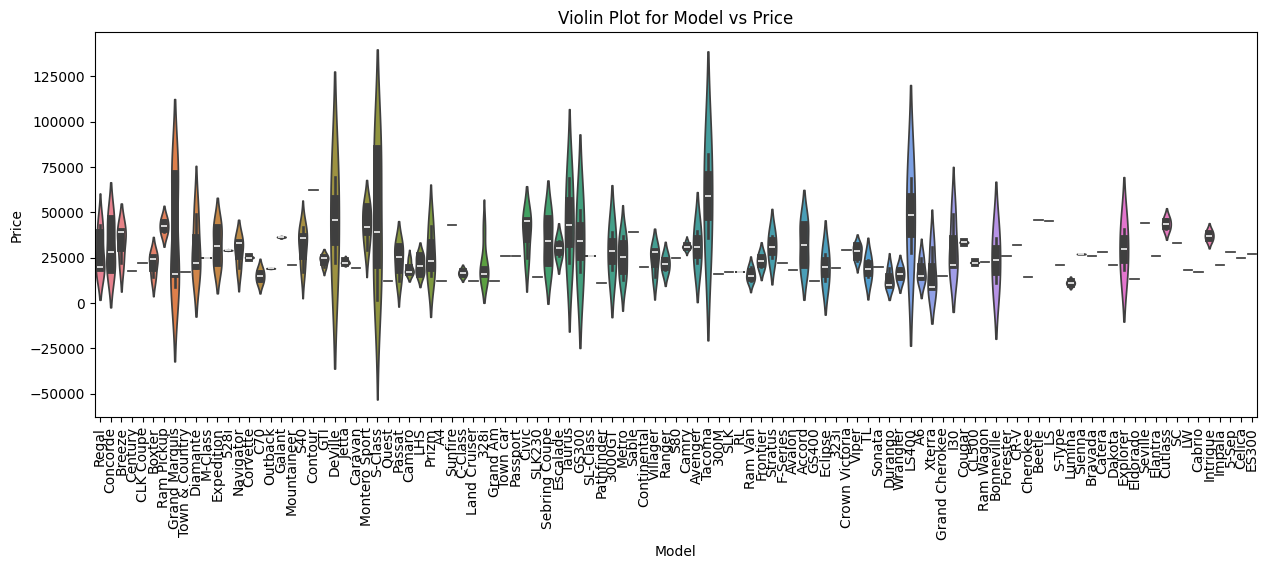

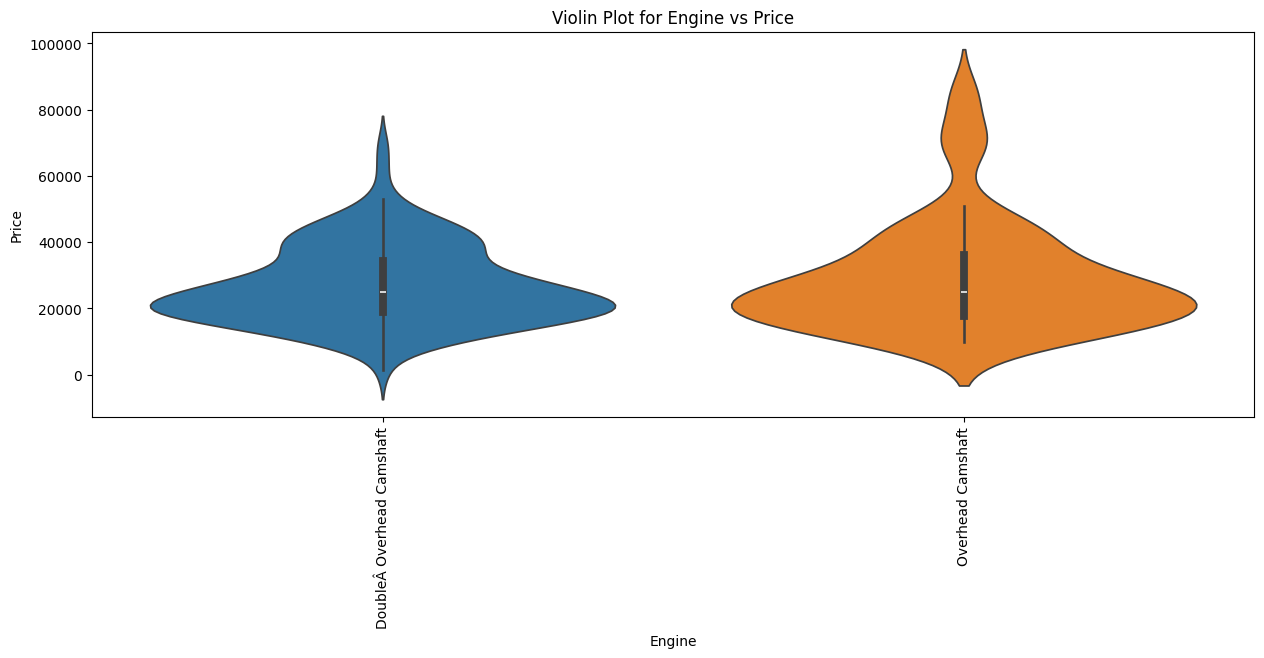

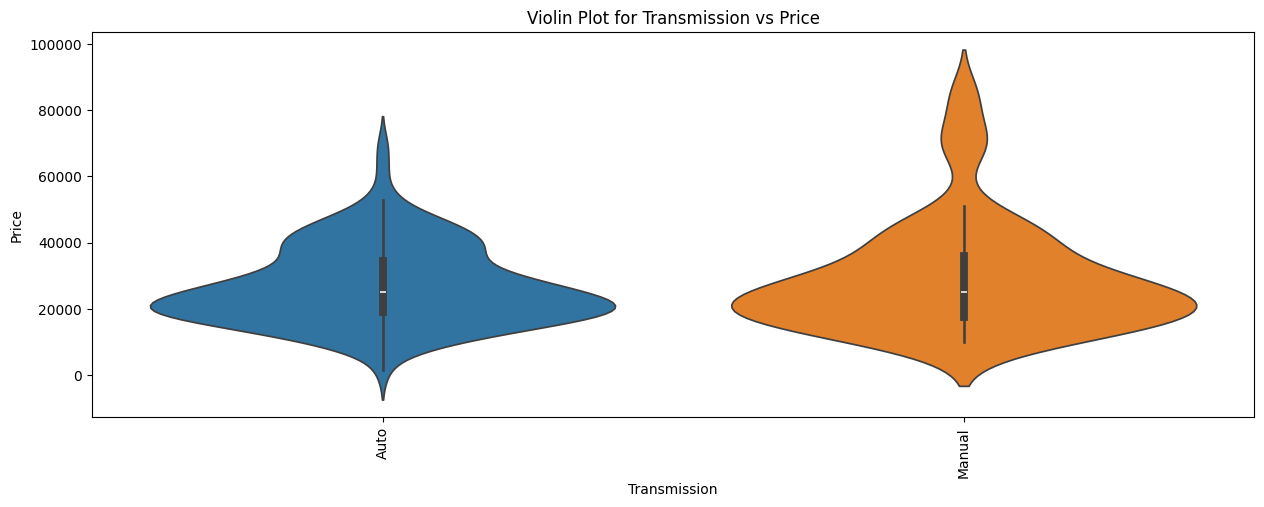

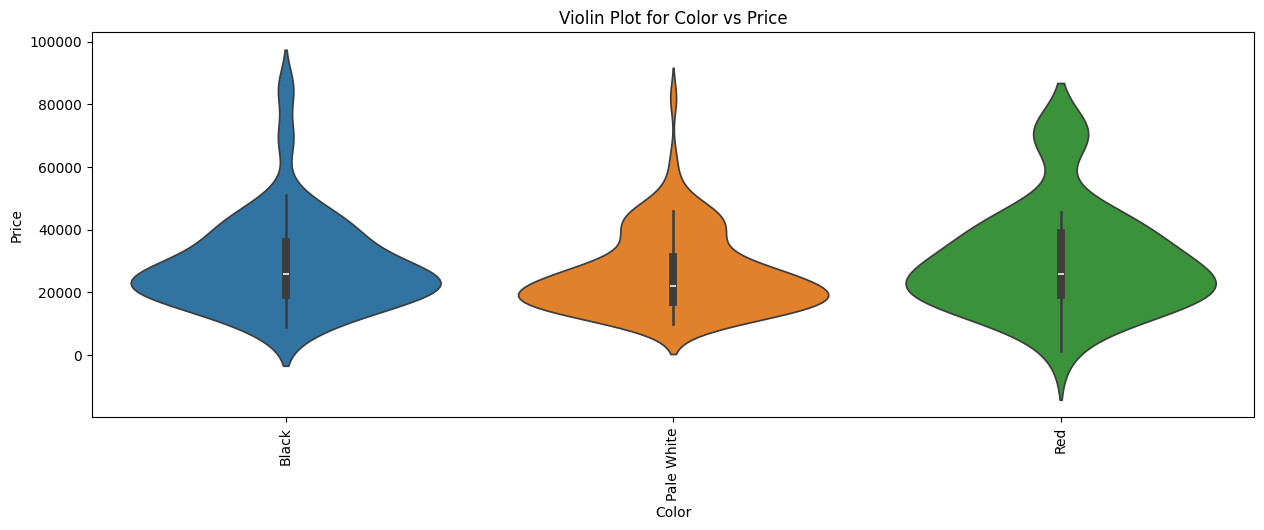

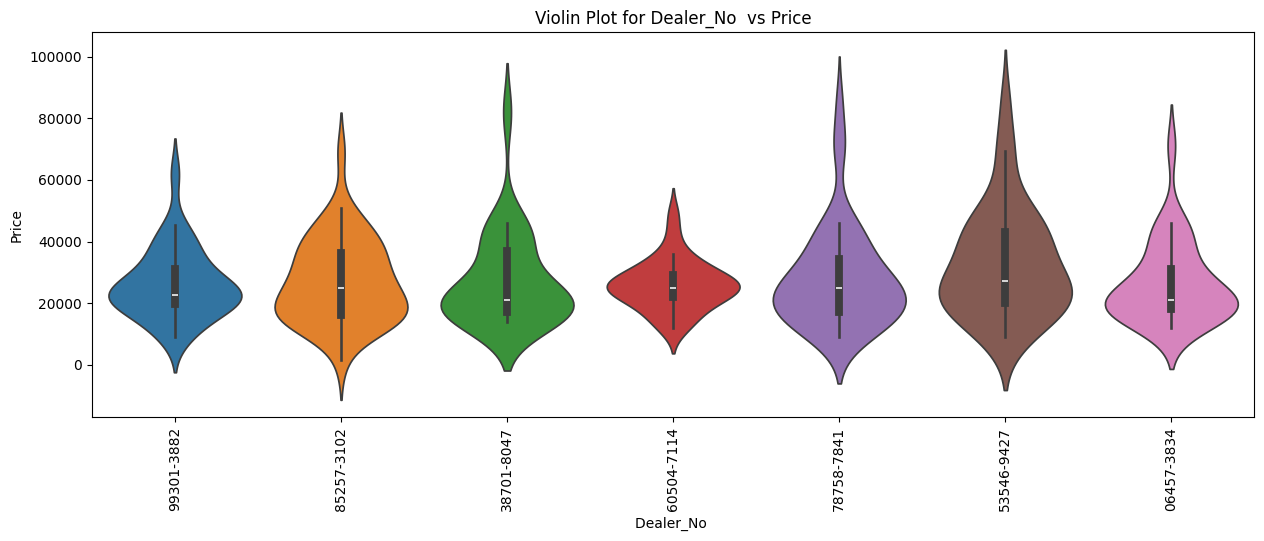

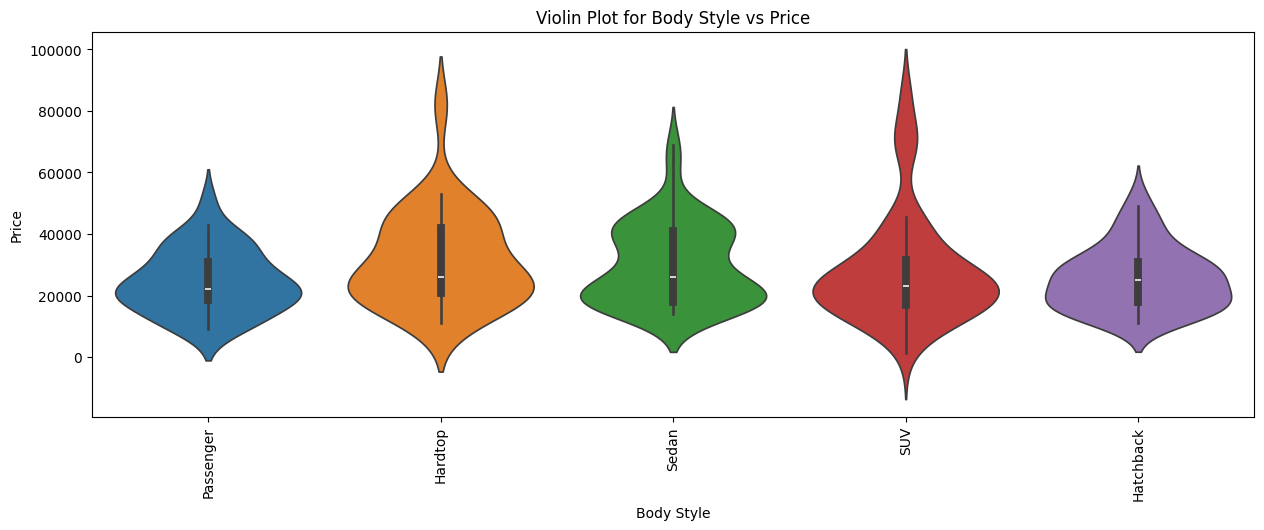

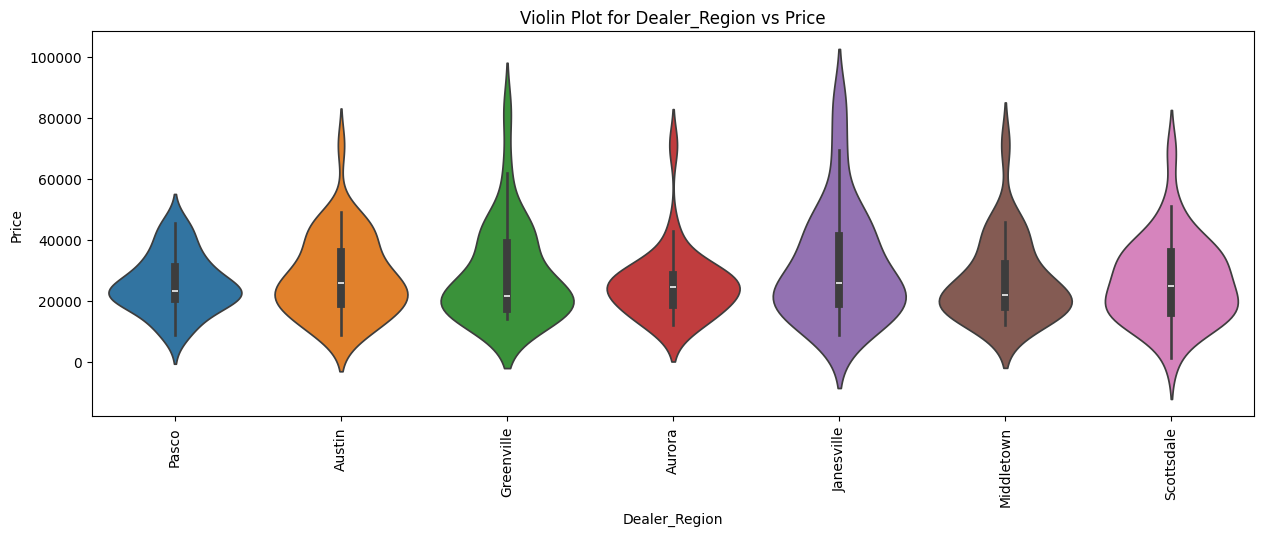

In [9]:
if not os.path.exists('./graph/bivariate'):
    os.makedirs('./graph/bivariate')

for i in range(len(object_columns)):
    plt.figure(figsize=(15, 5))
    sns.violinplot(x=object_columns[i], y='Price ($)', data=sampled_data, hue=object_columns[i])
    plt.title(f'Violin Plot for {object_columns[i]} vs Price')
    plt.xlabel(object_columns[i])
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.savefig(f'./graph/bivariate/{object_columns[i]}_vs_price_violinplot.png')

plt.show()


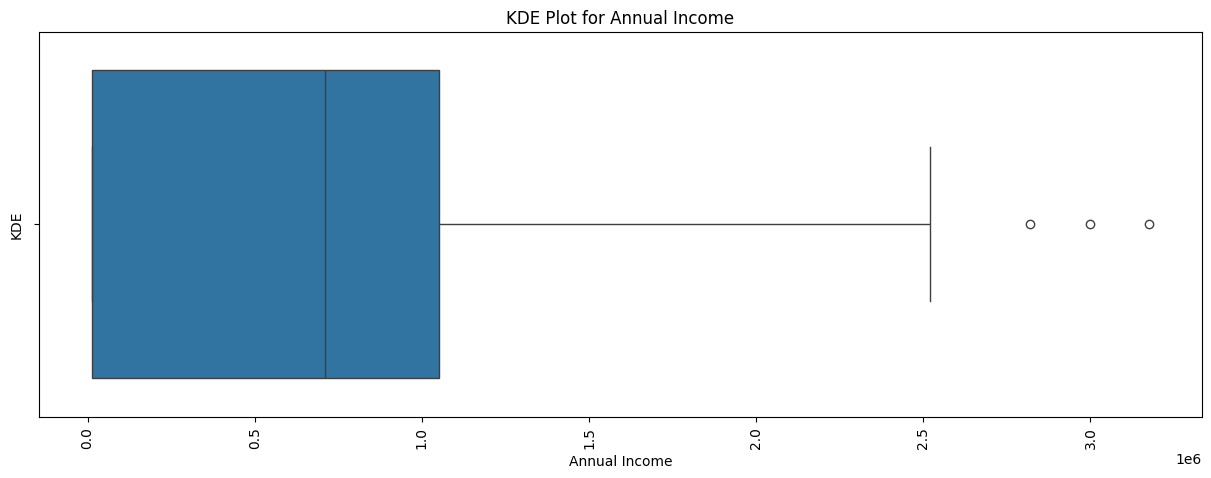

In [10]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=sampled_data['Annual Income'], data=sampled_data)
plt.title(f'KDE Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('KDE')
plt.xticks(rotation=90)
plt.savefig(f'./graph/bivariate/Annual_Income_KDE_plot.png')

plt.show()

## Multi-variate Analysis

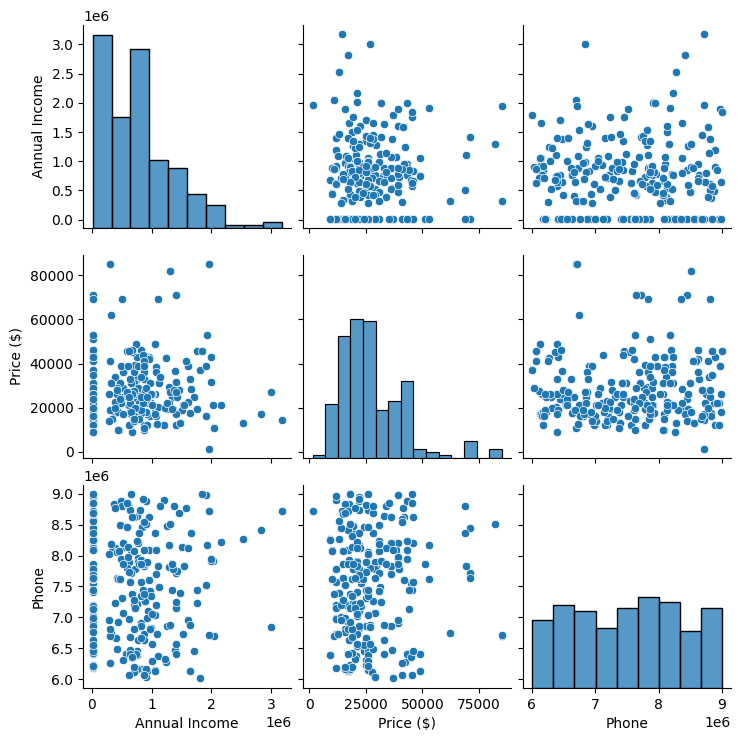

In [11]:
if not os.path.exists('./graph/multivariate'):
    os.makedirs('./graph/multivariate')

sns.pairplot(sampled_data)
plt.savefig('./graph/multivariate/pairplot.png')
plt.show()

# Convert, Encode, Normalization

## Convert `Date` to independent variable

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data = data.drop(['Date'], axis=1)

## Encoding

In [13]:
data = data.drop(['Car_id','Customer Name'], axis=1)

In [14]:
object_columns = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for i in range(len(object_columns)):
    data[object_columns[i]] = le.fit_transform(data[object_columns[i]])

## Normalizing

In [15]:
num_columns = data.select_dtypes(include=['int64', 'float64', 'int32']).columns
num_columns = num_columns.drop(['Price ($)'])

scaler = MinMaxScaler()
for i in range(len(num_columns)):
    data[num_columns[i]] = scaler.fit_transform(data[num_columns[i]].values.reshape(-1, 1))

# Features Analysis

In [16]:
data.head()

Gender  Annual Income  Dealer_Name   Company     Model  Engine  \
0     1.0       0.000306     0.000000  0.275862  0.392157     0.0   
1     1.0       0.131361     0.037037  0.241379  0.339869     0.0   
2     1.0       0.091593     0.074074  0.137931  0.372549     1.0   
3     1.0       0.000306     0.148148  0.931034  0.235294     1.0   
4     1.0       0.130021     0.111111  0.000000  0.921569     0.0   

   Transmission  Color  Price ($)  Dealer_No   Body Style     Phone  \
0           0.0    0.0      26000    0.000000        0.75  0.754990   
1           0.0    0.0      19000    0.500000        0.75  0.282745   
2           1.0    1.0      31500    0.166667        0.50  0.432974   
3           1.0    0.5      14000    1.000000        0.75  0.085834   
4           0.0    1.0      24500    0.333333        0.25  0.360523   

   Dealer_Region  Year  Month       Day  
0       0.666667   0.0    0.0  0.033333  
1       0.000000   0.0    0.0  0.033333  
2       0.333333   0.0    0.0  0.033333  
3       0.833333   0.0    0.0  0.033333  
4       0.500000   0.0    0.0  0.033333

In [17]:
summary_stats = data.describe()

print("Summary of Statistics:")
summary_stats

Summary of Statistics:


Gender  Annual Income   Dealer_Name       Company         Model  \
count  23906.000000   23906.000000  23906.000000  23906.000000  23906.000000   
mean       0.786330       0.073348      0.587790      0.489945      0.508799   
std        0.409905       0.064344      0.299926      0.300222      0.287410   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        1.000000       0.033595      0.333333      0.215517      0.274510   
50%        1.000000       0.064783      0.666667      0.517241      0.529412   
75%        1.000000       0.104171      0.851852      0.724138      0.751634   
max        1.000000       1.000000      1.000000      1.000000      1.000000   

             Engine  Transmission         Color     Price ($)    Dealer_No   \
count  23906.000000  23906.000000  23906.000000  23906.000000  23906.000000   
mean       0.474149      0.474149      0.435916  28090.247846      0.509091   
std        0.499342      0.499342      0.358033  14788.687608      0.326349   
min        0.000000      0.000000      0.000000   1200.000000      0.000000   
25%        0.000000      0.000000      0.000000  18001.000000      0.166667   
50%        0.000000      0.000000      0.500000  23000.000000      0.500000   
75%        1.000000      1.000000      0.500000  34000.000000      0.833333   
max        1.000000      1.000000      1.000000  85800.000000      1.000000   

         Body Style         Phone  Dealer_Region          Year         Month  \
count  23906.000000  23906.000000   23906.000000  23906.000000  23906.000000   
mean       0.534301      0.499300       0.492338      0.554714      0.622993   
std        0.330933      0.289214       0.331089      0.497008      0.296180   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.250000      0.248841       0.166667      0.000000      0.363636   
50%        0.500000      0.498786       0.500000      1.000000      0.727273   
75%        0.750000      0.749479       0.833333      1.000000      0.909091   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

                Day  
count  23906.000000  
mean       0.482435  
std        0.291139  
min        0.000000  
25%        0.233333  
50%        0.466667  
75%        0.733333  
max        1.000000

In [18]:
# Skewness and kurtosis
skewness = data.skew()
kurtosis = data.kurtosis()
# Display skewness and kurtosis values
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Skewness:
Gender          -1.397171
Annual Income    1.739838
Dealer_Name     -0.436012
Company          0.140170
Model           -0.109266
Engine           0.103550
Transmission     0.103550
Color            0.193628
Price ($)        1.466316
Dealer_No       -0.053531
Body Style      -0.088763
Phone            0.000863
Dealer_Region    0.070238
Year            -0.220193
Month           -0.415582
Day              0.036949
dtype: float64

Kurtosis:
Gender          -0.047918
Annual Income    7.572374
Dealer_Name     -1.059227
Company         -1.242038
Model           -1.134052
Engine          -1.989444
Transmission    -1.989444
Color           -1.041766
Price ($)        2.008315
Dealer_No       -1.217015
Body Style      -1.231417
Phone           -1.197919
Dealer_Region   -1.239599
Year            -1.951678
Month           -0.994360
Day             -1.190651
dtype: float64


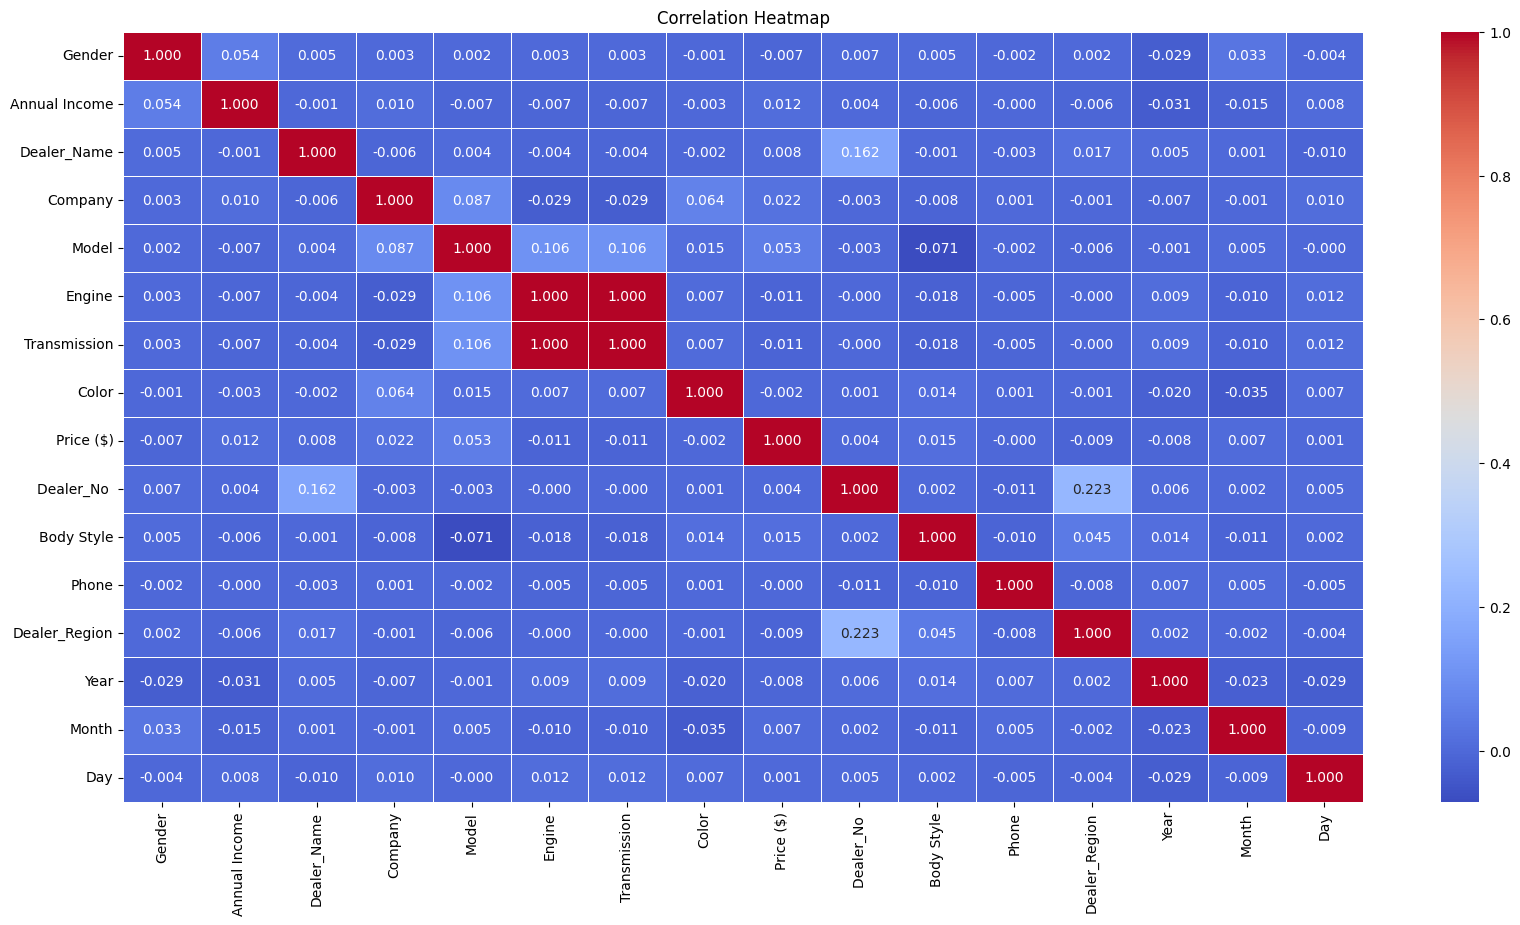

In [19]:
# Correlation matrix
correlation_matrix = data.corr()

# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt = ".3f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Calculate Multicollinearity
y = data.drop(["Price ($)"], axis =1)
X = sm.add_constant(y)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

         variable        VIF
0           const  34.660726
1          Gender   1.004938
2   Annual Income   1.004512
3     Dealer_Name   1.027468
4         Company   1.013523
5           Model   1.024921
6          Engine        inf
7    Transmission        inf
8           Color   1.006165
9      Dealer_No    1.081081
10     Body Style   1.007967
11          Phone   1.000395
12  Dealer_Region   1.055150
13           Year   1.003951
14          Month   1.003449
15            Day   1.001464


/root/miniconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [21]:
high_vif_variables = vif[vif["VIF"] >= 5]["variable"]
regression_data = X.drop(high_vif_variables, axis=1)

regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         23906 non-null  float64
 1   Annual Income  23906 non-null  float64
 2   Dealer_Name    23906 non-null  float64
 3   Company        23906 non-null  float64
 4   Model          23906 non-null  float64
 5   Color          23906 non-null  float64
 6   Dealer_No      23906 non-null  float64
 7   Body Style     23906 non-null  float64
 8   Phone          23906 non-null  float64
 9   Dealer_Region  23906 non-null  float64
 10  Year           23906 non-null  float64
 11  Month          23906 non-null  float64
 12  Day            23906 non-null  float64
dtypes: float64(13)
memory usage: 2.4 MB


# Regression

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.MSELoss()
epochs = 100

X = regression_data
y = data['Price ($)']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

train_X = torch.tensor(train_X.values, dtype=torch.float32).to(device).to(device)
train_y = torch.tensor(train_y.values, dtype=torch.float32).view(-1, 1).to(device)
test_X = torch.tensor(test_X.values, dtype=torch.float32).to(device)
test_y = torch.tensor(test_y.values, dtype=torch.float32).view(-1, 1)

trainset = TensorDataset(train_X, train_y)

In [23]:
def train(model, trainloader, criterion, epochs, optimizer):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        with tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}") as t:
            for inputs, labels in t:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                t.set_postfix(loss=running_loss)
        train_loss.append(running_loss)
    return train_loss

In [24]:
def test(model, test_X, test_y):
    model.eval()
    
    with torch.no_grad():
        y_pred = model(test_X).cpu().numpy()
        
    test_y = test_y.cpu().numpy()
    
    mse = mean_squared_error(test_y, y_pred)
    r2 = r2_score(test_y, y_pred)
    mae = mean_absolute_error(test_y, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")

## KAN

### Without Optuna

In [25]:
model = KAN([train_X.shape[1], 1, 1])
model.to(torch.float32).to(device)

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

trainloader = DataLoader(trainset, batch_size=512, shuffle=True)

train_losses = train(model, trainloader, criterion, epochs, optimizer)
test(model, test_X, test_y)

Epoch 100/100: 100%|██████████| 38/38 [00:00<00:00, 64.17it/s, loss=3.19e+10]

Mean Squared Error: 810523840.0
Mean Absolute Error: 24473.0
R2 Score: -2.8291521072387695


### With Optuna

In [26]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    hidden_layers = trial.suggest_int("n_hidden_layers", 2, 5)
    hidden_units = trial.suggest_int("hidden_units", 2, 64)
    batchsize = trial.suggest_int("batchsize", 32, 2048)

    trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True)

    model = KAN([train_X.shape[1], hidden_units * hidden_layers, 1])
    model.to(torch.float32).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, foreach=False)

    train_loss = 0
    model.train()
    for _ in range(100):
        for _, (X, y) in enumerate(trainloader):
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

    return train_loss


study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=30)

best_trial = study.best_trial
print("Best Learning Rate:", best_trial.params["learning_rate"])
print("Best Weight Decay:", best_trial.params["weight_decay"])
print("Best Number of Hidden Layers:", best_trial.params["n_hidden_layers"])
print("Best Hidden Units:", best_trial.params["hidden_units"])
print("Best Batch Size:", best_trial.params["batchsize"])

[I 2024-06-14 17:08:01,803] A new study created in memory with name: no-name-0c462a13-6c6d-42e7-b24e-626e7b880fa9
[I 2024-06-14 17:09:02,994] Trial 0 finished with value: 4086737298864.0 and parameters: {'learning_rate': 0.00031489116479568613, 'weight_decay': 0.0071144760093434225, 'n_hidden_layers': 4, 'hidden_units': 39, 'batchsize': 346}. Best is trial 0 with value: 4086737298864.0.
[I 2024-06-14 17:09:25,281] Trial 1 finished with value: 1418393831168.0 and parameters: {'learning_rate': 4.207053950287933e-05, 'weight_decay': 1.493656855461762e-05, 'n_hidden_layers': 5, 'hidden_units': 39, 'batchsize': 1460}. Best is trial 1 with value: 1418393831168.0.
[I 2024-06-14 17:10:16,648] Trial 2 finished with value: 4966017328512.0 and parameters: {'learning_rate': 1.2087541473056957e-05, 'weight_decay': 0.008123245085588688, 'n_hidden_layers': 5, 'hidden_units': 15, 'batchsize': 398}. Best is trial 1 with value: 1418393831168.0.
[I 2024-06-14 17:10:51,042] Trial 3 finished with value: 31

Best Learning Rate: 0.040797034415661425
Best Weight Decay: 0.0006493452208646041
Best Number of Hidden Layers: 3
Best Hidden Units: 53
Best Batch Size: 1850


In [27]:
plot_parallel_coordinate(study)

In [28]:
plot_slice(study)

In [29]:
plot_param_importances(study)

In [30]:
best_learning_rate = best_trial.params["learning_rate"]
best_weight_decay = best_trial.params["weight_decay"]
best_hidden_layers = best_trial.params["n_hidden_layers"]
best_hidden_units = best_trial.params["hidden_units"]
best_batchsize = best_trial.params["batchsize"]

trainloader = DataLoader(trainset, batch_size=best_batchsize, shuffle=True)

model = KAN([train_X.shape[1], best_hidden_units * best_hidden_layers, 1])
model.to(torch.float32).to(device)

optimizer = optim.AdamW(model.parameters(), lr=best_learning_rate, weight_decay=best_weight_decay, foreach=False)

epochs = 100

train_losses = train(model, trainloader, criterion, epochs, optimizer)

Epoch 100/100: 100%|██████████| 11/11 [00:00<00:00, 38.23it/s, loss=1.67e+9]


Mean Squared Error: 154348272.0
Mean Absolute Error: 9070.0029296875
R2 Score: 0.270813524723053


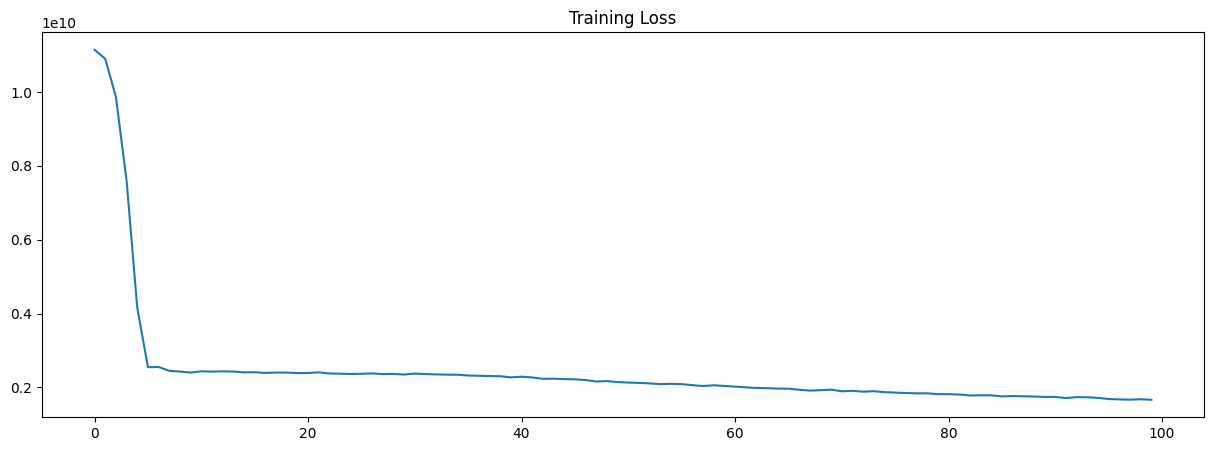

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(train_losses)
plt.title("Training Loss")

test(model, test_X, test_y)

## ResNet

In [32]:
class ResNet(nn.Module):
    def __init__(self, num_classes):
        super(ResNet, self).__init__()
        self.num_classes = num_classes
        
        self.resnet = models.resnet18()
        self.resnet.conv1 = nn.Conv2d(self.num_classes, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(512, 1)

    def forward(self, x):
        x = x.view(-1, self.num_classes, 1, 1)
        x = self.resnet(x)
        return x

### Without Optuna

In [33]:
model = ResNet(train_X.shape[1])
model.to(torch.float32).to(device)

trainloader = DataLoader(trainset, batch_size=512, shuffle=True)

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

_ = train(model, trainloader, criterion, epochs, optimizer)
test(model, test_X, test_y)

Epoch 1/100:   0%|          | 0/38 [00:00<?, ?it/s]/root/miniconda3/lib/python3.12/site-packages/torch/autograd/graph.py:744: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

Epoch 100/100: 100%|██████████| 38/38 [00:00<00:00, 39.15it/s, loss=7.46e+9]


Mean Squared Error: 214679056.0
Mean Absolute Error: 10551.6015625
R2 Score: -0.014206767082214355


### With Optuna

In [34]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    batchsize = trial.suggest_int("batchsize", 32, 2048)

    trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True)

    model = ResNet(train_X.shape[1])
    model.to(torch.float32).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, foreach=False)
    criterion = nn.MSELoss()

    train_loss = 0
    model.train()
    for _ in range(100):
        for _, (X, y) in enumerate(trainloader):
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

    return train_loss


study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=30)

best_trial = study.best_trial
print("Best Learning Rate:", best_trial.params["learning_rate"])
print("Best Weight Decay:", best_trial.params["weight_decay"])
print("Best Batch Size:", best_trial.params["batchsize"])

[I 2024-06-14 17:25:39,073] A new study created in memory with name: no-name-89b18fa9-c459-444f-b557-c1aca549caa8
[I 2024-06-14 17:26:18,809] Trial 0 finished with value: 1283319354944.0 and parameters: {'learning_rate': 0.00031489116479568613, 'weight_decay': 0.0071144760093434225, 'batchsize': 1508}. Best is trial 0 with value: 1283319354944.0.
[I 2024-06-14 17:28:12,573] Trial 1 finished with value: 1646527516056.0 and parameters: {'learning_rate': 0.0024810409748678114, 'weight_decay': 2.9380279387035334e-05, 'batchsize': 346}. Best is trial 0 with value: 1283319354944.0.
[I 2024-06-14 17:28:53,794] Trial 2 finished with value: 1619639298496.0 and parameters: {'learning_rate': 1.7073967431528103e-05, 'weight_decay': 0.003967605077052989, 'batchsize': 1244}. Best is trial 0 with value: 1283319354944.0.
[I 2024-06-14 17:29:29,116] Trial 3 finished with value: 386470066368.0 and parameters: {'learning_rate': 0.006796578090758156, 'weight_decay': 1.1527987128232396e-05, 'batchsize': 19

Best Learning Rate: 0.0744307027621045
Best Weight Decay: 1.0422971466648454e-05
Best Batch Size: 1987


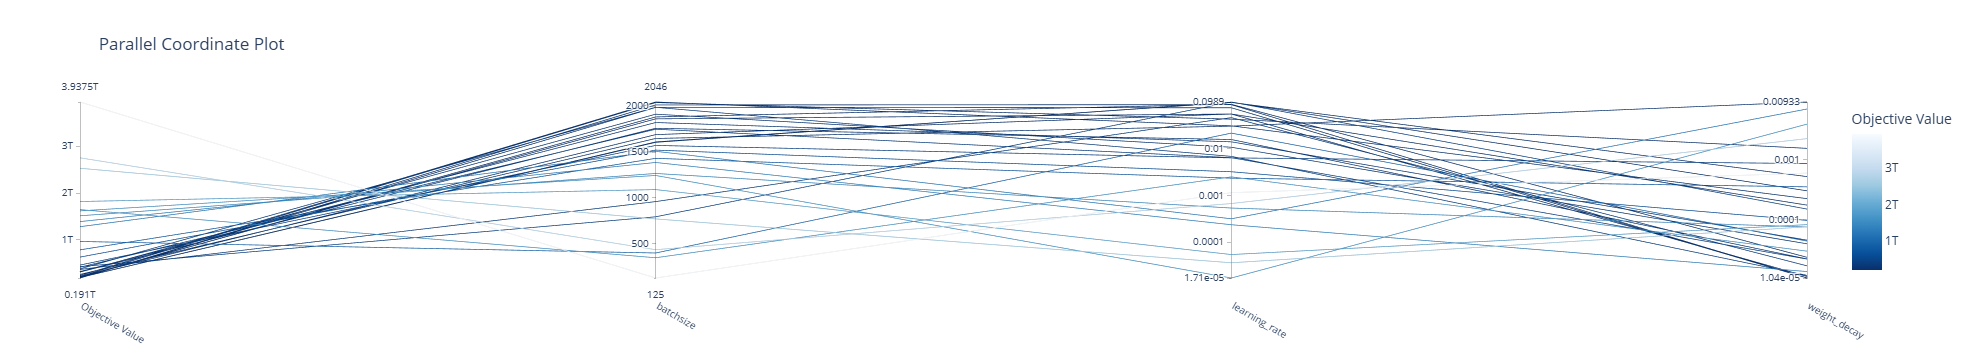

In [35]:
plot_parallel_coordinate(study)

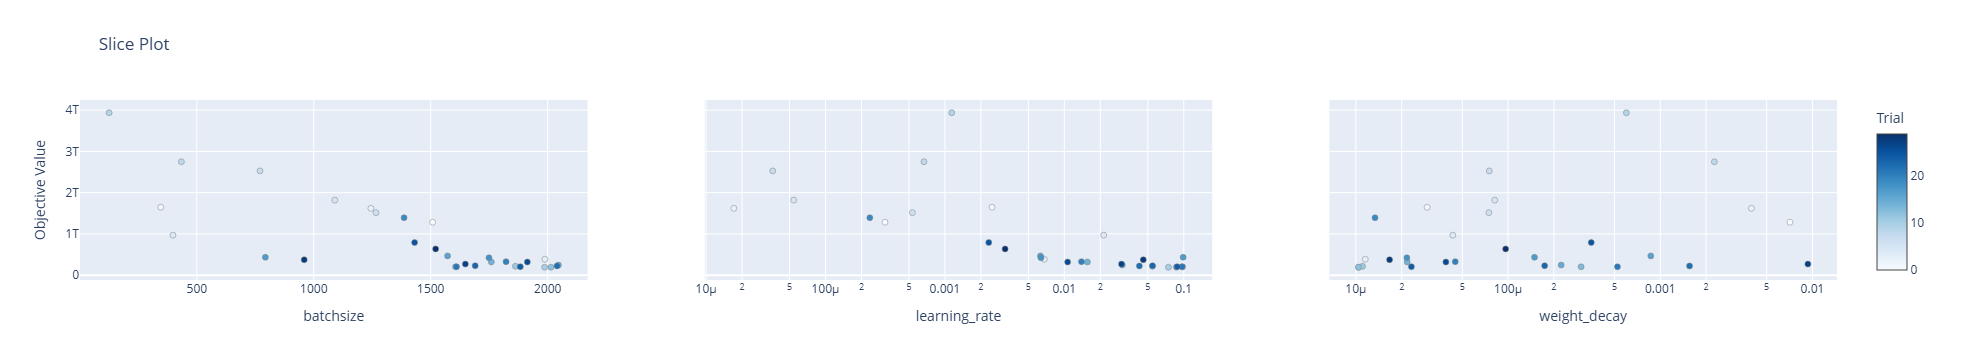

In [36]:
plot_slice(study)

In [37]:
plot_param_importances(study)

In [38]:
best_learning_rate = best_trial.params["learning_rate"]
best_weight_decay = best_trial.params["weight_decay"]
best_batchsize = best_trial.params["batchsize"]

trainloader = DataLoader(trainset, batch_size=best_batchsize, shuffle=True)

model = ResNet(train_X.shape[1])
model.to(device)
model.float()

optimizer = optim.AdamW(model.parameters(), lr=best_learning_rate, weight_decay=best_weight_decay, foreach=False)

train_losses = train(model, trainloader, criterion, epochs, optimizer)

Epoch 100/100: 100%|██████████| 10/10 [00:00<00:00, 21.80it/s, loss=1.17e+9]


Mean Squared Error: 150034480.0
Mean Absolute Error: 8606.7724609375
R2 Score: 0.2911931872367859


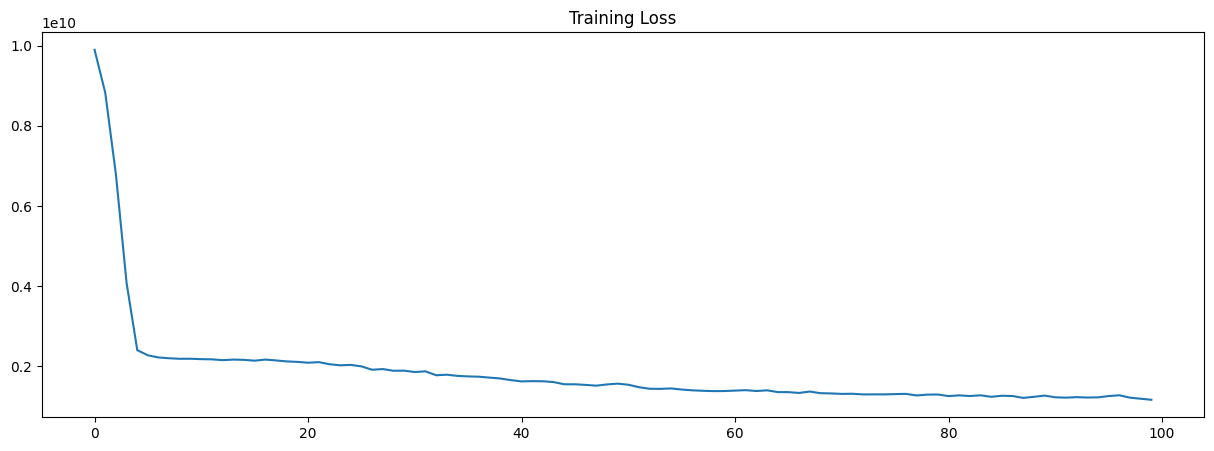

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(train_losses)
plt.title("Training Loss")

test(model, test_X, test_y)

# Linear Sequence Analysis

## ARIMA

In [ ]:
df = pd.read_csv('./data/car_data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# Sort the dataset by date
df.sort_values(by='Date', inplace=True)

df.head()

Car_id       Date Customer Name Gender  Annual Income  \
0   C_CND_000001 2022-01-02     Geraldine   Male          13500   
20  C_CND_000021 2022-01-02      Adrianna   Male          13500   
21  C_CND_000022 2022-01-02        Joshua   Male        2500000   
23  C_CND_000024 2022-01-02        Arthur   Male         920000   
24  C_CND_000025 2022-01-02        Lizzie   Male         672000   

                            Dealer_Name     Company           Model  \
0   Buddy Storbeck's Diesel Service Inc        Ford      Expedition   
20              Clay Johnson Auto Sales      Toyota         4Runner   
21                        Classic Chevy    Infiniti             I30   
23                 Star Enterprises Inc     Porsche  Carrera Cabrio   
24                        Suburban Ford  Volkswagen           Jetta   

                       Engine Transmission       Color  Price ($)  Dealer_No   \
0   DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
20          Overhead Camshaft       Manual       Black      25000  78758-7841   
21  DoubleÂ Overhead Camshaft         Auto       Black      21000  85257-3102   
23  DoubleÂ Overhead Camshaft         Auto  Pale White      18000  99301-3882   
24  DoubleÂ Overhead Camshaft         Auto  Pale White      22000  53546-9427   

   Body Style    Phone Dealer_Region  
0         SUV  8264678    Middletown  
20      Sedan  7889827        Austin  
21    Hardtop  6183219        Austin  
23  Passenger  7959858         Pasco  
24  Passenger  8570849    Janesville

In [ ]:
new_df = df.loc[:, ['Date', 'Price ($)']]
new_df.head()

Date  Price ($)
0  2022-01-02      26000
20 2022-01-02      25000
21 2022-01-02      21000
23 2022-01-02      18000
24 2022-01-02      22000

In [ ]:
new_df.set_index('Date', inplace = True)
data_daily_mean = new_df.resample('D').mean()
data_daily_mean.isnull().sum()

Price ($)    117
dtype: int64

In [ ]:
data_daily_mean = data_daily_mean.ffill().bfill()
data_daily_mean.isnull().sum()

Price ($)    0
dtype: int64

In [ ]:
# Moving Average 
# Calculate Simple Moving Average (SMA)
sma_period = 10
new_df['SMA'] = data_daily_mean['Price ($)'].rolling(window=sma_period).mean().reindex(new_df.index, method='ffill')

# Calculate Exponential Moving Average (EMA)
ema_period = 10
data_daily_mean['EMA'] = data_daily_mean['Price ($)'].ewm(span=ema_period, adjust=False).mean()
new_df['EMA'] = data_daily_mean['EMA'].reindex(new_df.index, method='ffill')

# Calculate Cummulative Moving Average (CMA)
new_df['CMA'] = data_daily_mean['Price ($)'].expanding(min_periods=1).mean().reindex(new_df.index, method='ffill')

# Calculate Weighted Moving Average (WMA)
wma_period = 10 
weights = pd.Series(range(1, wma_period + 1))
def weighted_moving_average(prices):
    return np.dot(prices, weights) / weights.sum()

new_df['WMA'] = data_daily_mean['Price ($)'].rolling(window=wma_period).apply(weighted_moving_average, raw=True).reindex(new_df.index, method='ffill')

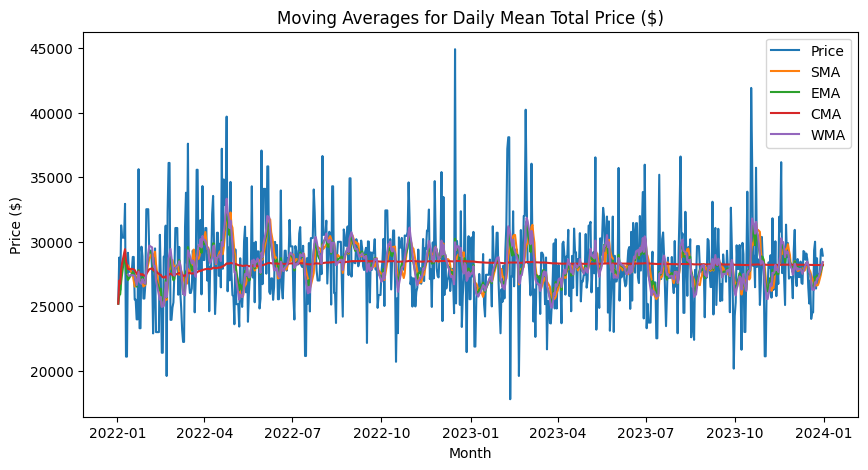

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(data_daily_mean.index, data_daily_mean['Price ($)'], label = 'Price')
plt.plot(new_df['SMA'], label = 'SMA')
plt.plot(new_df['EMA'], label = 'EMA')
plt.plot(new_df['CMA'], label = 'CMA')
plt.plot(new_df['WMA'], label = 'WMA')
plt.title('Moving Averages for Daily Mean Total Price ($)')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:
def adf_test(series):
    result = adfuller(series, autolag = 'AIC')
    print(f'ADF Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical values: {result[4]}')
    
print("Original Data ADF Test:")
adf_test(data_daily_mean['Price ($)'])


Original Data ADF Test:
ADF Statistics: -22.495431315142852
p-value: 0.0
Critical values: {'1%': -3.4393644334758475, '5%': -2.8655182850048306, '10%': -2.568888486973192}


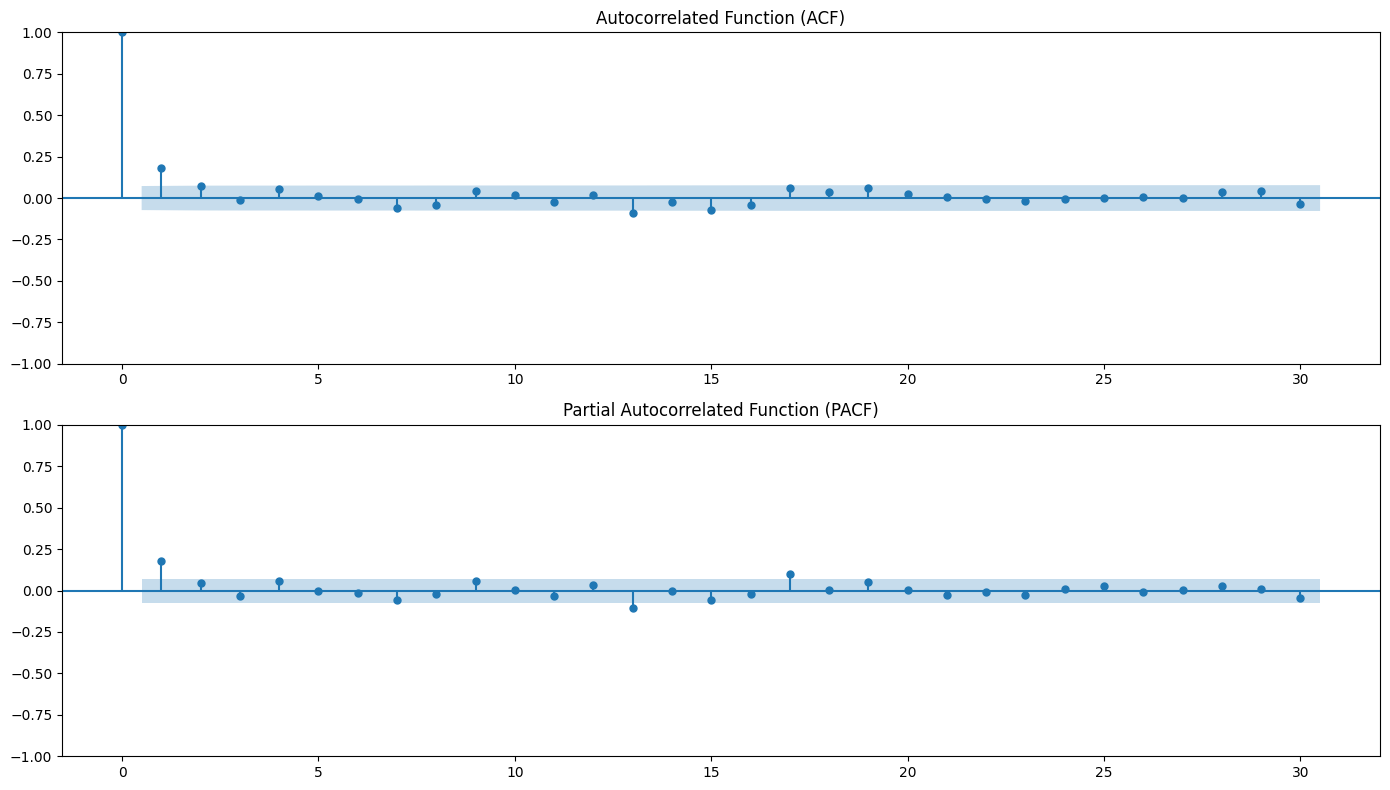

In [ ]:
plt.figure(figsize = (14, 8))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(data_daily_mean['Price ($)'], lags = 30, ax = plt.gca())
plt.title('Autocorrelated Function (ACF)')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(data_daily_mean['Price ($)'], lags = 30, ax = plt.gca())
plt.title('Partial Autocorrelated Function (PACF)')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
acf_values = acf(data_daily_mean['Price ($)'], nlags = 30)
pacf_values = pacf(data_daily_mean['Price ($)'], nlags = 30)

# Calculate the 95% confidence interval threshold
threshold = 1.96/np.sqrt(len(data_daily_mean['Price ($)']))
p, q = sum(abs(pacf_values[1:]) > threshold), sum(abs(acf_values[1:]) > threshold)
d = 0

print(f"Number significant p values: {p}\nNumber significant q values: {q}")

Number significant p values: 3
Number significant q values: 3


In [ ]:
modelARIMA = ARIMA(data_daily_mean['Price ($)'], order = (p, d, q))
resultsARIMA = modelARIMA.fit()
print(resultsARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Price ($)   No. Observations:                  729
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -6914.930
Date:                Sun, 16 Jun 2024   AIC                          13845.861
Time:                        12:41:39   BIC                          13882.594
Sample:                    01-02-2022   HQIC                         13860.034
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.82e+04    152.557    184.845      0.000    2.79e+04    2.85e+04
ar.L1         -1.3900      0.185     -7.504      0.000      -1.753      -1.027
ar.L2         -0.5628      0.288     -1.956      0.0

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


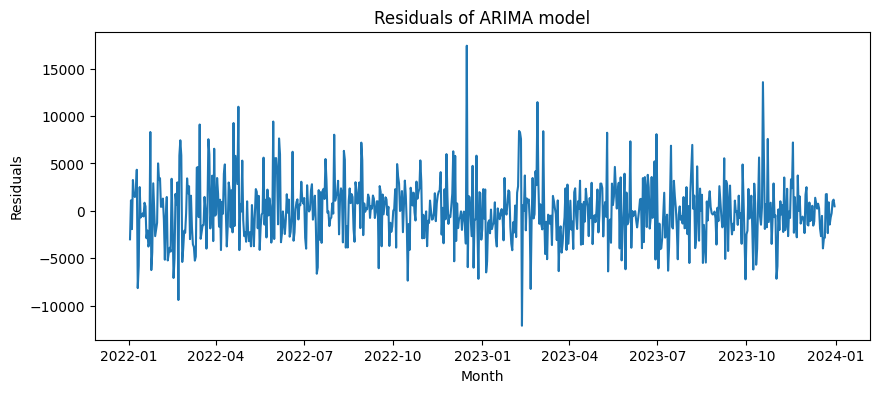

In [ ]:
residuals = resultsARIMA.resid
plt.figure(figsize = (10, 4))
plt.plot(residuals)
plt.title('Residuals of ARIMA model')
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.show()

In [ ]:
train_size = int(len(data_daily_mean)*0.8)
train, validation = data_daily_mean.iloc[:train_size], data_daily_mean.iloc[train_size:]

predictions = resultsARIMA.predict(start = validation.index[0], end = validation.index[-1], type = 'levels')

In [ ]:
rmse_score = np.sqrt(mean_squared_error(validation['Price ($)'], predictions))
mse = mean_squared_error(validation['Price ($)'], predictions)
r2 = r2_score(validation['Price ($)'], predictions)
mae = mean_absolute_error(validation['Price ($)'], predictions)
print(f'Root Mean Squared Error (RMSE): {rmse_score}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 2834.8795301616783
Mean Squared Error (MSE): 8036541.950529698
Mean Absolute Error (MAE): 2061.689443051339
R-squared (R2): 0.04480436637798513


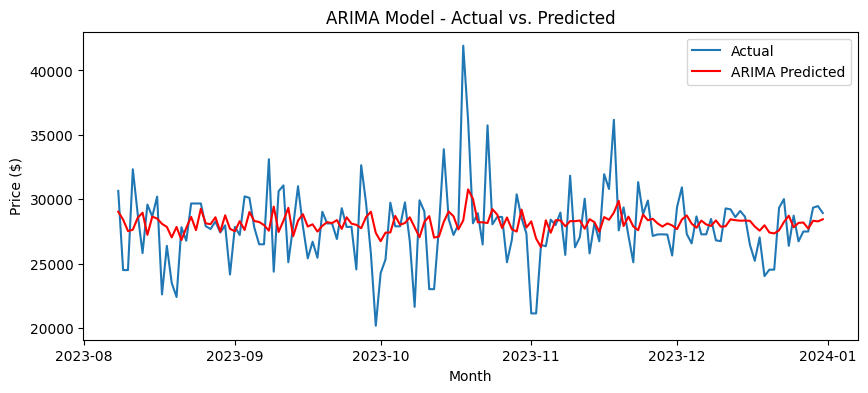

In [ ]:
plt.figure(figsize = (10, 4))
plt.plot(validation['Price ($)'], label = 'Actual')
plt.plot(predictions, color = 'red', label = 'ARIMA Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel("Month")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [ ]:
forecast_steps = 30
forecast = resultsARIMA.get_forecast(steps = forecast_steps)
predicted_values = forecast.predicted_mean
print(predicted_values)

2024-01-01    28525.223082
2024-01-02    28009.691124
2024-01-03    28421.091581
2024-01-04    28067.740598
2024-01-05    28217.048279
2024-01-06    28296.411518
2024-01-07    28026.443844
2024-01-08    28388.997246
2024-01-09    28053.954680
2024-01-10    28257.858435
2024-01-11    28240.573879
2024-01-12    28078.142265
2024-01-13    28357.293261
2024-01-14    28056.979138
2024-01-15    28282.561042
2024-01-16    28197.749232
2024-01-17    28124.414952
2024-01-18    28322.360473
2024-01-19    28070.330222
2024-01-20    28293.565239
2024-01-21    28167.463146
2024-01-22    28163.177927
2024-01-23    28287.878268
2024-01-24    28089.964759
2024-01-25    28293.974468
2024-01-26    28148.464614
2024-01-27    28193.558265
2024-01-28    28256.428268
2024-01-29    28112.517746
2024-01-30    28286.826474
Freq: D, Name: predicted_mean, dtype: float64


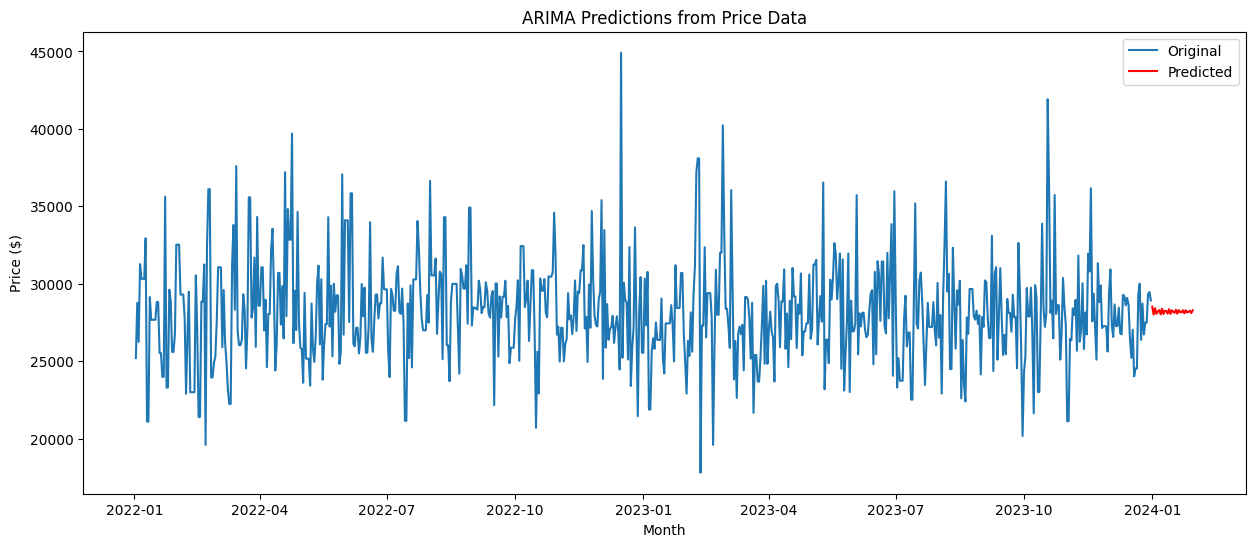

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(data_daily_mean['Price ($)'], label = 'Original')
plt.plot(predicted_values.index, predicted_values.values, color = 'red', label = 'Predicted')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.title('ARIMA Predictions from Price Data')
plt.legend()
plt.show()

## ARIMA-GARCH

In [ ]:
# Rescale the residuals
residuals = residuals*0.01

In [ ]:
# Fit GARCH model on ARIMA residuals
modelGARCH = arch_model(residuals, mean='Zero', vol='Garch', p=3, q=3)
resultsGARCH = modelGARCH.fit()
print(resultsGARCH.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 3581.847574909379
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3572.336515163427
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3564.7881675932954
Iteration:      4,   Func. Count:     37,   Neg. LLF: 3548.052574049771
Iteration:      5,   Func. Count:     46,   Neg. LLF: 3549.547218176254
Iteration:      6,   Func. Count:     55,   Neg. LLF: 3546.3337834935155
Iteration:      7,   Func. Count:     63,   Neg. LLF: 3546.1582205859786
Iteration:      8,   Func. Count:     71,   Neg. LLF: 3546.1566885504853
Iteration:      9,   Func. Count:     79,   Neg. LLF: 3546.156648719056
Iteration:     10,   Func. Count:     87,   Neg. LLF: 3546.1565847410675
Iteration:     11,   Func. Count:     95,   Neg. LLF: 3546.156579463591
Iteration:     12,   Func. Count:    103,   Neg. LLF: 3546.1565493503776
Iteration:     13,   Func. Count:    111,   Neg. LLF: 3546.1563951284475
Iteration:     14,   Func. Count:    119,   Neg. LLF: 354

In [ ]:
garch_variances = resultsGARCH.conditional_volatility[-len(validation):]
# Combine ARIMA with GARCH predictions
combined_predictions = predictions.values + (garch_variances * 100)

rmse_combined = np.sqrt(mean_squared_error(validation['Price ($)'], combined_predictions))
mse_combined = mean_squared_error(validation['Price ($)'], combined_predictions)
r2_combined = r2_score(validation['Price ($)'], combined_predictions)
mae_combined = mean_absolute_error(validation['Price ($)'], combined_predictions)
print(f'Root Mean Squared Error (RMSE): {rmse_combined}')
print(f'Mean Squared Error (MSE): {mse_combined}')
print(f'Mean Absolute Error (MAE): {mae_combined}')
print(f'R-squared (R2): {r2_combined}')

Root Mean Squared Error (RMSE): 4399.202917360584
Mean Squared Error (MSE): 19352986.308113877
Mean Absolute Error (MAE): 3762.3576680412853
R-squared (R2): -1.3002291449295034


In [ ]:
# Align the mean of combined predictions with the mean of ARIMA predictions
mean_arima_predictions = np.mean(predictions.values)
mean_combined_predictions = np.mean(combined_predictions)
adjustment_factor = mean_arima_predictions - mean_combined_predictions
combined_predictions_adjusted = combined_predictions + adjustment_factor

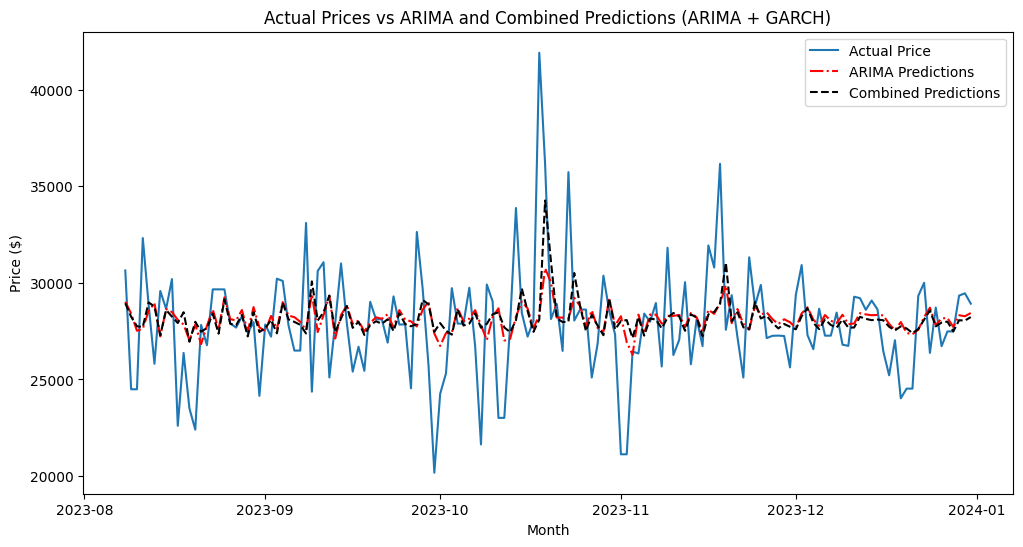

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(validation['Price ($)'], label='Actual Price')
plt.plot(validation.index, predictions, label='ARIMA Predictions', color = "red", linestyle='-.')
plt.plot(validation.index, combined_predictions_adjusted, label='Combined Predictions', color='black', linestyle='--')
plt.title('Actual Prices vs ARIMA and Combined Predictions (ARIMA + GARCH)')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:
# Future forecast
future_forecast_steps = 30
future_forecastARIMA = resultsARIMA.get_forecast(steps=future_forecast_steps)
future_forecastGARCH = resultsGARCH.forecast(horizon=future_forecast_steps)
combined_forecast_future = future_forecastARIMA.predicted_mean.values + np.sqrt(future_forecastGARCH.variance.values[-1, :])

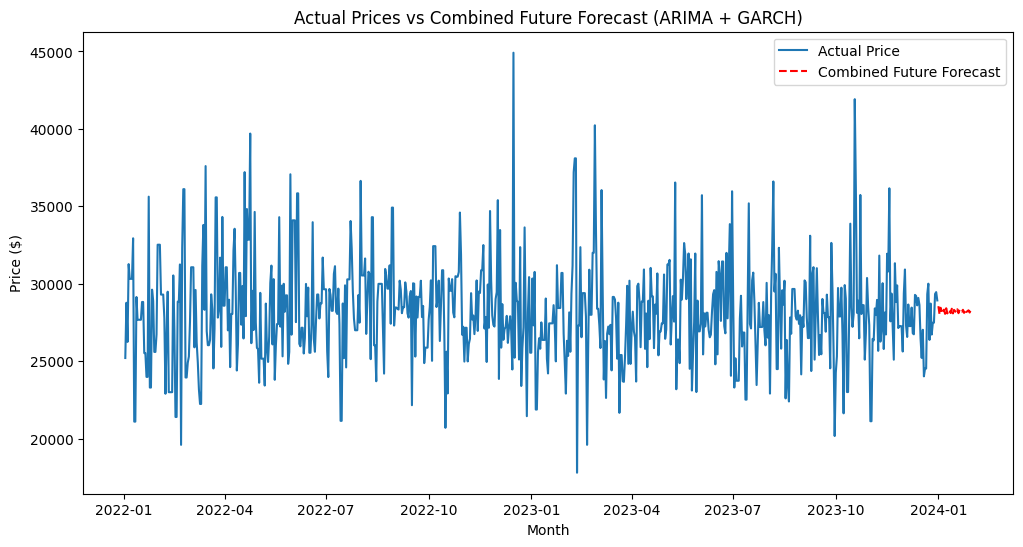

In [ ]:
# Plot future forecast
future_forecast_index = pd.date_range(start=validation.index[-1] + pd.Timedelta(days=1), periods=future_forecast_steps, freq='D')
plt.figure(figsize=(12, 6))
plt.plot(data_daily_mean['Price ($)'], label='Actual Price')
plt.plot(future_forecast_index, combined_forecast_future, label='Combined Future Forecast', color='red', linestyle='--')
plt.title('Actual Prices vs Combined Future Forecast (ARIMA + GARCH)')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 21.92637365525037
Mean Squared Error (MSE): 480.76586166965745
Mean Absolute Error (MAE): 18.31444399451109
R-squared (R2): -0.2698589020553479


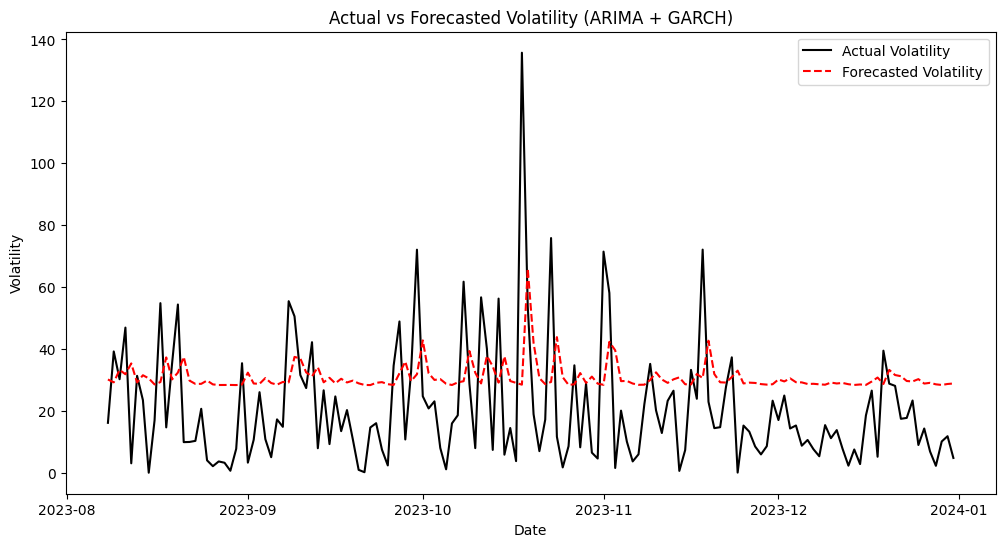

In [ ]:
# Extract the actual volatility in the validation period
actual_volatility = np.sqrt(residuals[-len(validation):] ** 2)

# Extract the forecasted volatility in the validation period
forecasted_volatility = resultsGARCH.conditional_volatility[-len(validation):]

# Calculate for volatility predictions
mse_volatility = mean_squared_error(actual_volatility, forecasted_volatility)
r2_volatility = r2_score(actual_volatility, forecasted_volatility)
mae_volatility = mean_absolute_error(actual_volatility, forecasted_volatility)
print(f'Root Mean Squared Error (RMSE): {rmse_volatility}')
print(f'Mean Squared Error (MSE): {mse_volatility}')
print(f'Mean Absolute Error (MAE): {mae_volatility}')
print(f'R-squared (R2): {r2_volatility}')

# Plot actual vs forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(validation.index, actual_volatility, label='Actual Volatility', color='black')
plt.plot(validation.index, forecasted_volatility, label='Forecasted Volatility', color='red', linestyle='--')
plt.title('Actual vs Forecasted Volatility (ARIMA + GARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


## LSTM Model

In [60]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMRegressor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [68]:
X = data.drop(['Price ($)'], axis=1)
y = data['Price ($)']

X = X.values
y = y.values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

def objective(trial):
    input_size = X_train.shape[1]
    hidden_size = trial.suggest_int('hidden_size', 10, 100)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    
    model = LSTMRegressor(input_size, hidden_size, num_layers, output_size=1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    num_epochs = 20
    for _ in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.unsqueeze(1), y_batch
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = 0
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch.unsqueeze(1))
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    
    return val_loss

input_size = 15
output_size = 1
num_epochs = 100

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)

print(f'Best hyperparameters: {study.best_params}')

best_params = study.best_params
input_size = 15
hidden_size = best_params['hidden_size']
num_layers = best_params['num_layers']
learning_rate = best_params['learning_rate']

model = LSTMRegressor(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

[I 2024-06-14 18:17:33,325] A new study created in memory with name: no-name-2209830c-8d76-45ac-a917-de93f95f2c11
/tmp/ipykernel_2057/1885958212.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-06-14 18:17:46,443] Trial 0 finished with value: 36837616704.0 and parameters: {'hidden_size': 44, 'num_layers': 3, 'learning_rate': 0.0029106359131330704}. Best is trial 0 with value: 36837616704.0.
[I 2024-06-14 18:17:54,970] Trial 1 finished with value: 37401286656.0 and parameters: {'hidden_size': 64, 'num_layers': 1, 'learning_rate': 0.00020511104188433984}. Best is trial 0 with value: 36837616704.0.
[I 2024-06-14 18:18:06,288] Trial 2 finished with value: 37351037120.0 and parameters: {'hidden_size': 15, 'num_layers': 3, 'learning_rate': 0.0015930522616241021}. Best is trial 0 with value: 36837616704.0.
[I 2024-06-14 18

Best hyperparameters: {'hidden_size': 87, 'num_layers': 2, 'learning_rate': 0.0099524331661705}


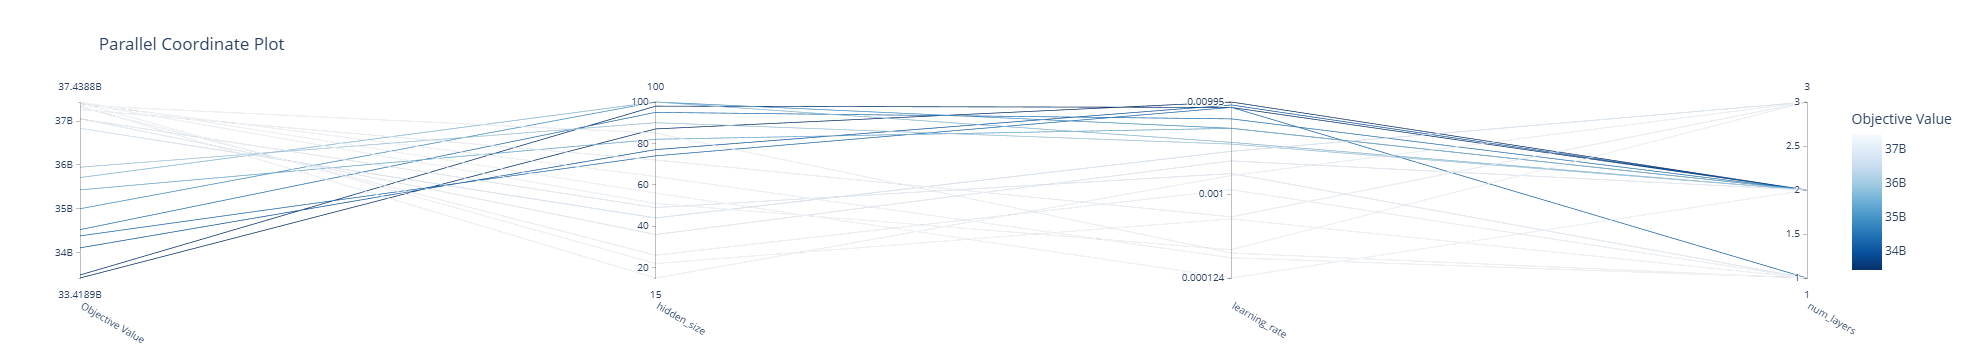

In [69]:
plot_parallel_coordinate(study)

In [70]:
plot_slice(study)

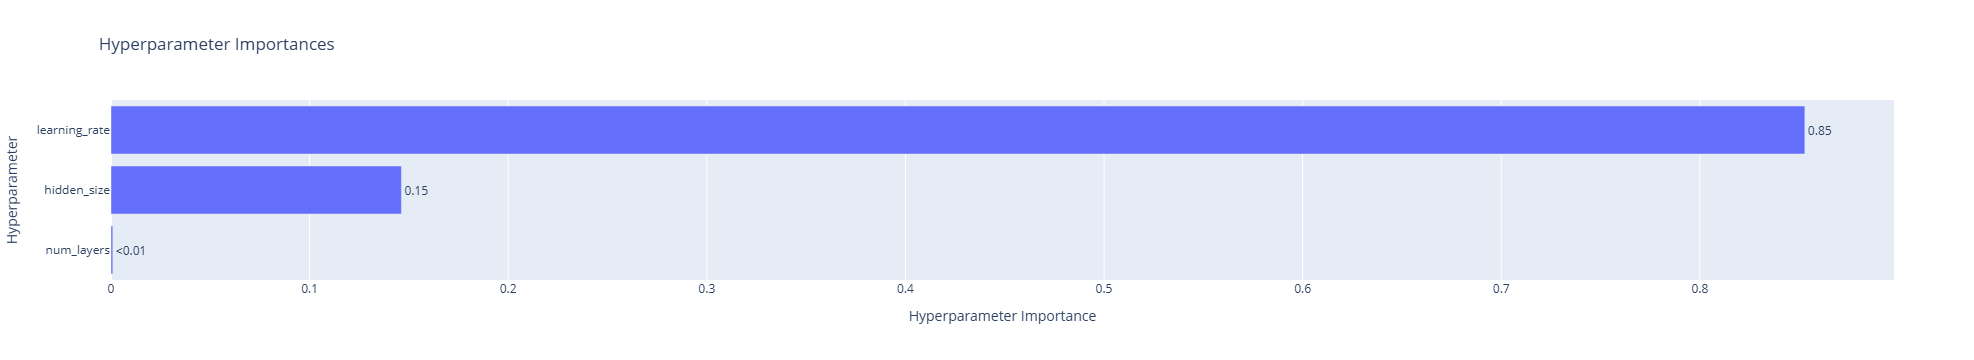

In [71]:
plot_param_importances(study)

In [72]:
train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}') as pbar:
        for X_batch, y_batch in pbar:
            optimizer.zero_grad()
            outputs = model(X_batch.unsqueeze(1))
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix(loss=loss.item())
    train_losses.append(train_loss)


Epoch 100/100: 100%|██████████| 150/150 [00:00<00:00, 211.20it/s, loss=5e+8]   


Mean Squared Error: 535028992.0
Mean Absolute Error: 18005.130859375
R2 Score: -1.5276339054107666


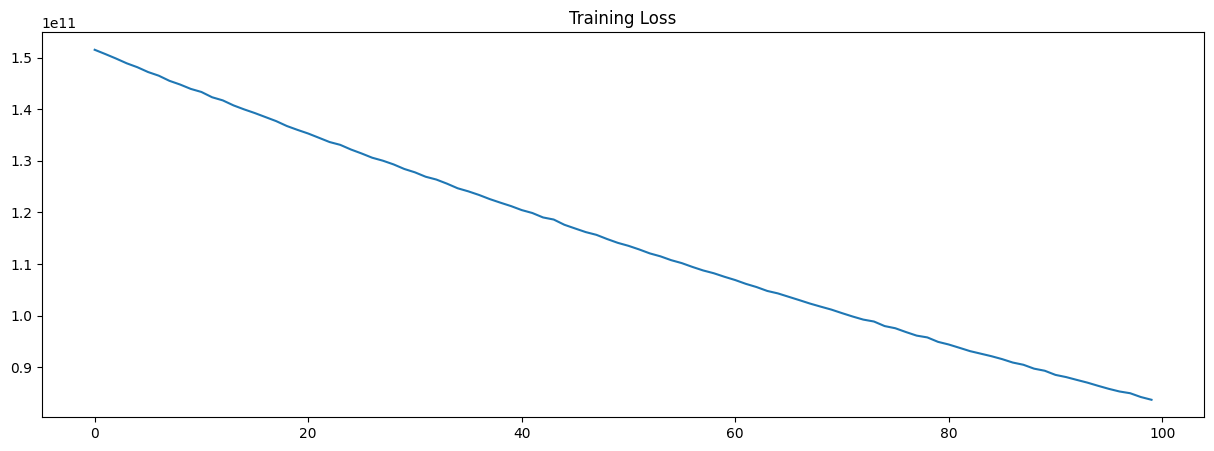

In [74]:
plt.figure(figsize=(15, 5))
plt.plot(train_losses)
plt.title("Training Loss")

model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor.unsqueeze(1)).cpu().numpy()

test_y = test_y.cpu().numpy()

mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")